In [2]:
import pandas as pd
import numpy as np

In [4]:
id_df = pd.read_csv("train_identity.csv")
trans_df = pd.read_csv("train_transaction.csv")

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df_train = pd.merge(id_df, trans_df, on="TransactionID", how="left")

In [133]:
df_train.shape

(144233, 434)

In [134]:
len(df_train[df_train["isFraud"]==1])/len(df_train)

0.07847025299342036

In [135]:
from sklearn.model_selection import train_test_split

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

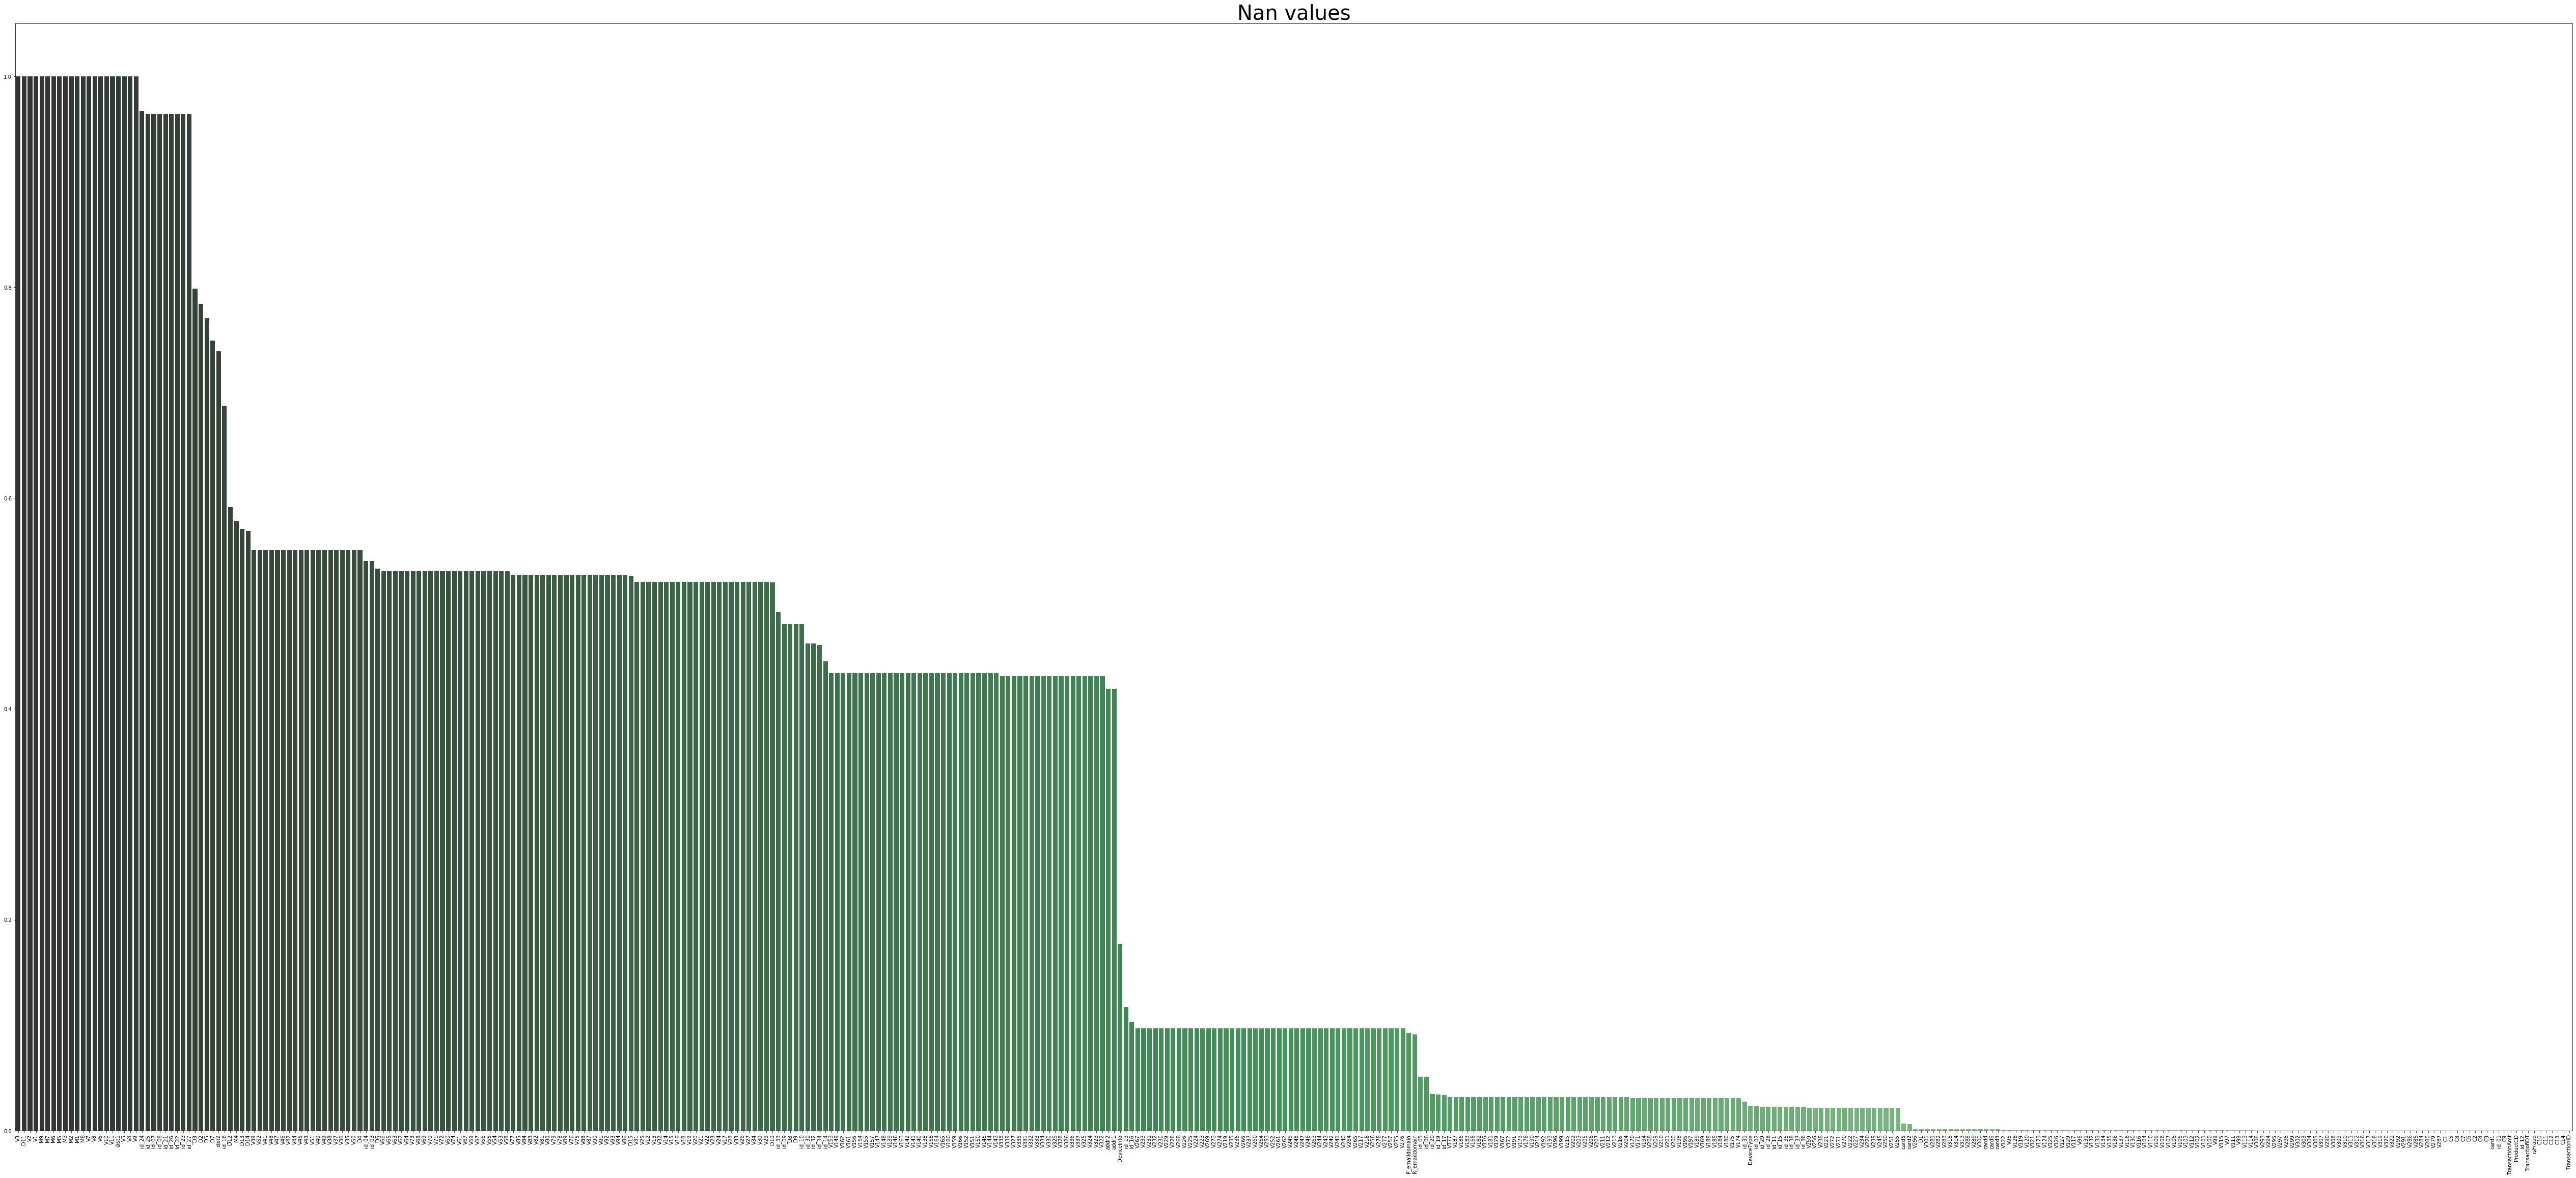

In [137]:
plt.figure(figsize=(90,40))
sns.barplot(y=df_train.isnull().sum().sort_values(ascending=False)/len(df_train),
       x=df_train.isnull().sum().sort_values(ascending=False).index,
       palette='Greens_d')
plt.title("Nan values", size=40)
plt.xticks(rotation=90)

In [115]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAE8MAAAkKCAYAAACrFA3PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdeZRtZXkn4N97mREFFMQB4YpDFAdEQBMh4tR2HFaMdDvgAFETNbG7nV1qnKOdjklHjTHaxhiuiqJ2tGOM7bDSTjhy7RUnwGirRBRlkklBBN7+ow66OVbdOqdu3V2Xus+z1llrf99+v+97967686zfqe4OAAAAAAAAAAAAAAAAAAAAAAAAAIxpw1o3AAAAAAAAAAAAAAAAAAAAAAAAAMCORxgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAMAOpKpOqqq+9rPW/QAAAAAAAAAAALDjEoYHAAAAAAAAAABwPVZVG4fBZoPPH6xgr+8O1p+/LfoFAAAAAAAAAAAAuJYwPAAAAAAAAAAAgPXpRVW1+1o3AQAAAAAAAAAAALAUYXgAAAAAAAAAAADr0y2S/OFaNwEAAAAAAAAAAACwFGF4AAAAAAAAAAAA69fzq2qvtW4CAAAAAAAAAAAAYDHC8AAAAAAAAAAAANav/ZM8fa2bAAAAAAAAAAAAAFiMMDwAAAAAAAAAAID15RNJLh2Mn1NV+6xRLwAAAAAAAAAAAABLEoYHAAAAAAAAAACwvlyQ5LWD8T5Jnr1GvQAAAAAAAAAAAAAsaee1bgAAAAAAAAAAAIBV99+TPC3JjSfjZ1TV67r7/G11YFXtk+TOSW4/OXfXJBcl+VGSL3T32dvgzCOT3CHJLZNcnuT7ST7R3Res9llrpap2S3KnLDznAUlukOTSJOcn+Zckp3d3r12H205V7ZzkHkluk+SmWfgB4HOTnJFkc3dfs8J9d01y1yy815tk4Z1enuTiJGclOaO7v7fVDwAAAAAAAAAAAMCyhOEBAAAAAAAAAACsM919cVX9eZL/OpnaK8nzkzxnNc+pqjsmOT7Jg5McnoWwsqVqT0/y50ne3t1Xzbj/MORtU3f/7mT+8UlekOSOiyy7pqrek+R5qxloVlWHJPlWkppMvb+7j5tzjxsm+WGSPSdTm7v7qEXqbprkkUl+J8m9kuyxhW3Pq6o3JHldd180Tz+zqKrvJjl4Mvxkd99nxnUbk3xnMPXy7n7ZjGsPTvKSJMcl2WeJsvOq6k1JXt3dl8247/5JXpzksfllUORStWcn+ackr+nub8yyPwAAAAAAAAAAAPNb8ouHAAAAAAAAAAAAXK/9ZZJzB+M/rKqbr9bmk3C407MQLnZElv8+2qFJ3prkI1W1xSCyLZy5a1W9LcnbsngQXiZ9PDrJF6rq0JWcs5ju/naSTw+mHlpVN5lzm0fkl0F4SbJpibrNSV6f5P7ZchBekuyf5GVJ/qWqDpuzn+1OVT0ryTeSPDFLB+ElC8/94iSnV9WdZtj3nknOTPKfs0wQ3sSBSZ6S5EEz1AIAAAAAAAAAALBCO691AwAAAAAAAAAAAKy+7v5JVf1JktdMpvZI8qIkT1ulI6bD765O8s0k305ycZKdkhyQ5G5J9h7U3S/JB6rq2O6+es4z35Dk8ZPrnyc5LcnZSXZJcpcktx3U3jzJe6vq8O6+cs5zlrIpyb0n17skOT7JX82x/sTB9ZVJ3rVE3fS7/V4WAuJ+nIXnvnGSuya5xaDm4CT/XFWHdff35+hpu1FVr03y9KnpK5P83yTfz8L/2MFJjszC/1eS3CrJp6vq6O4+Y4l9b5rkfyfZd+rWN7PwXi9OsmsWwvfuMNkTAAAAAAAAAACAEQjDAwAAAAAAAAAAWL/emOTZSQ6cjH+vql7d3Wet0v5XZCHQ7X1J/rm7L58uqKpdkjw8yZ8lOWgyfXSSZ03mZvXQJDdJck2SP03y6u6+aOqshyR5RxZCzZLk0CRPysJ7WA3vTfL6JHtOxidmxjC8qtqY5DcHUx/s7guWKL8myYeTnJLkQ9193hJ7/kYW3sW1+94kyZuTPGSWnrYnVfX7uW4Q3mVJXpLkb7r7sqnamyX5kyS/O5naN8m7quqe3f2zRbZ/bq4bhPfhJM/s7jOX6OWAJA/Owv9Oz/80AAAAAAAAAAAAzGr612MBAAAAAAAAAABYJybBYK8aTO2ahYCx1fCDJLfq7id29wcXC8Kb9PDz7n5PkqOSfGtw6+lVNc8Put4kC8Fkx3f3C6eD8CZn/VOSR01NP2GOM7aouy/NQvDftY6sqkNnXH5CkhqMN22h9je7+0HdvWmpILxJP59Lct8k7x9MP7iq7jhjT9uFqjooyesGU+cmOaq7XzMdhJck3f3D7n5CklcOpg9L8sQljnjo4PrMJL+9VBDeZP8fdfffdfcxSf7HrM8BAAAAAAAAAADA/IThAQAAAAAAAAAArG9/m+Tbg/EJVXW7rd20u3/a3efPUX9ukmcNpm6Z5Jg5j33zJFhvS+d8NMnnBlNHVNUN5jxnS06aGp8447oTBtfnJfnQUoXdfdaszXT31UmekuRng+npQMDt3TOT7DEYP25LYXUDL0myeTB+xhJ1Bw2uP9jdP5+1se6+YtZaAAAAAAAAAAAA5icMDwAAAAAAAAAAYB2bBH+9YjC1c5KXr1E7H851Q9vuOef6V89YNwya25DkLnOesyUfT/Jvg/HjqmqnLS2oqqOT3GYwdXJ3X7VaDXX3eUk+O5ia972umaraNcmTBlOf6u6PzbK2uzvJ6wdTt6+q2y6zbP85WwQAAAAAAAAAAGAbEoYHAAAAAAAAAACw/r0jyZmD8aOq6s7b6rCq2rOqDqiqg6tq47WfJLdM8uNB6R3m2Pab3f3tGWvPnBqvWgBad1+T5O2DqVskecAyy06cGp+0krOrateq2m/6vU7e7cWD0nne61o7KskNB+O/n3P9p6bGRy9S843B9SOq6h5zngEAAAAAAAAAAMA2svNaNwAAAAAAAAAAAMC21d1XV9XLkpwymdqQ5BVJjluN/avqsCSPSXJMkrvkuuFmW7LvHMecMUftxVPjG82xdhabkvzRYHxCko8sVlhVuyd55GDqy9395VkOqapbJjk+yQOT3DXJATP2N897XWvT4XXnTcL9ZrXb1PiQRWpOSXL45HrPJKdW1TuTvDPJJ7v7Z3OcBwAAAAAAAAAAwCoShgcAAAAAAAAAALBjeE+SFyQ5bDJ+eFUd0d1fWumGVXVgktcn+Z0VbjFPSN10wN2W/HxqvMsca5fV3d+sqs8muddk6uFVdaPuvmSR8ocl2XswPmm5/ScBei9P8sysrPfVDv/blg6cGr9zK/e78SJzr89CIOERk/EuSU6cfK6oqi8k+UySTyY5tbt/upU9AAAAAAAAAAAAMKMNa90AAAAAAAAAAAAA2153d5KXTE2/cqX7VdXGJKdm5UF4yXzfYbtmK87ZFjYNrvdI8ogl6k4cXF+VZcLeqmq3JP+Q5HlZeYhfrXDdWlgsvG5r7DU90d2XJ7lfkpOT9NTt3ZMcm+SFST6S5LyqeldVHbnKfQEAAAAAAAAAALAIYXgAAAAAAAAAAAA7iO7+QJIvDqZ+q6qOXuF2b01y8GB8SZI3ZiEU7q5J9kuyZ5IN3V3XfpKctcLztjfvTnLFYHzidEFV3SzJAwdTH+ruc5fZ9/lTa65O8r4kv5fkqCS3yELg205T73XTr+x0/bDSwL+lLBoE2N2XdPfjsvC/+RdJzlxi/Z5JHp3ktKr666pa7f4AAAAAAAAAAAAY2HmtGwAAAAAAAAAAAGBUL0ry0cH4VUnuM88GVXVMkvsOpr6W5IHdfc4My284z1nbq+6+uKr+VxaC05LkmKo6pLu/PSh7bJKdBuMtBtZV1e5JnjOYuiwL7/VzM7S0vb3XWX+s98Kp8a27+7ur3MsvdPfXkjw7ybOr6oAk90py7yQPSHLnqfI/yMJzPHVb9QMAAAAAAAAAALCjm/XLZgAAAAAAAAAAAKwD3f2xJJ8aTB1bVQ+Yc5uHTI2fOksQ3iTsbZ85z9qeDcPtKskJU/eH4wuSfHCZ/Y5Nstdg/N9mDMJLkpvNWDevqwbX8/wA76x/5x9NjW83xxlbpbt/1N3v7+5ndvddktwhyd9NlT25qg4dqycAAAAAAAAAAIAdjTA8AAAAAAAAAACAHc8fTY1fOef62w6uL+vuz8y47qisr++tfSzJDwbjE6qqkqSqDk9y18G9d3X3lcvsd9up8UdmaaKqdk1y91lqV+CSwfU8QYazBsh9fmp8/znOWFXd/Y3ufmKStwymK8lD16glAAAAAAAAAACAdW89fakQAAAAAAAAAACAGXT3qblu0No9q2qewK+9B9eXzrHusXPUbve6++ok7xhM3TrJMZPrE6bKN82w5d5T40sWrfpVxyXZfcbaeZ03uL5NVe0847p/P2Pdp5MMQwKPn4T7raXpv9XGtWgCAAAAAAAAAABgRyAMDwAAAAAAAAAAYMf0oqnxHyepGddeNLi+aVXts9yCqvq1/GpA3Hpw0tT4xElg3GMGc1/v7s0z7HXR1Pj2yy2oqt2TvHiGvVfqy4Pr3ZPcZ7kFVXVIkkfOsnl3/yTJ2wdTByV57hz9bQvTIYRXLloFAAAAAAAAAADAVhOGBwAAAAAAAAAAsAOahLP9w2DqblkIIpvFVwfXOyX5L1sqrqr9k7w3yR7z9Hh90N1nJDltMPWIJMcluelgbtOM2311avyMqloyoLCqdkryliSHzrj/Snx8avyiqlryu4dVdaMkpyTZdY4zXpXrBs69oqrmCk6sqn2q6j8sMr9fVT2pqnabY7vHTo2/MU8vAAAAAAAAAAAAzE4YHgAAAAAAAAAAwI7rxUl6BeveN7XupVX1vOnAsaraUFW/neTzSe6S5Iokl6202e3YSYPrGyV5w2B8dZJ3zLjP55J8fzC+f5KTJ2GC11FVhyX5WH4Z3Hb+rM3O6aNTPR2b5O1Vte8iPd0vyWeTHJXkolkP6O7vJPlPg6kNSTZV1SlVdfhS66rqBlX10Kp6a5LvJXnuImV7ZSEw8Kyqem1VHVNVuyyx395V9aokzxlMX5Hk72d9FgAAAAAAAAAAAOaz81o3AAAAAAAAAAAAwNro7q9W1buTPHrOdV+vqnckefxkakOSP03y/Kr6fJILk+yb5IgkBwyWPicLgWV7bW3v25lTkvxFkmvDAPcb3Ptod58zyybdfVVVvSTJ3w6mj09yXFV9IcnZSfZMcsckvzao+Z9JfpLkxJW1v8Werq6q5yU5eTD9mCQPr6rPJvlRkhsmOTzJgZP7lyd5SpJ3z3HO31TVrZO8YDD9qCSPqqofJvlKkguy8L+2T5JbJ7ltZv9R4AOSPH3y+VlVfS3JD5JcnIW/28GTZ5gOynt+d58763MAAAAAAAAAAAAwH2F4AAAAAAAAAAAAO7aXJnlEkp3mXPfUJIckOXowt2+SBy1R/+LufkNVPXf+Frdv3X1hVf1jkv+4yO2T5tzrrVV15yTPHEzvluTeSyz5xyyEEr5pnnPm7OmdVXVEkmcNpvdIcv9Fyi/Nwnv41xWc88Kq+nqSv05yo8Gtm00+y/nxjEftloWgxiO2UHNVkhd29+tm3BMAAAAAAAAAAIAVmPUXUQEAAAAAAAAAAFiHuvtfk7xtBet+muS+SV6R5OIlyq5O8rEk9+3uV664yeuHTYvMXZTkA/Nu1N3PSvLYJP9vC2VfSfL7SR7W3VfMe8YKenp2FkL3/m2JkiuTnJLkbt390a045+QkG5O8PMl3Z1hyVpK3JPl3SR6yyP3vJXlgkr9KckaSXma/nyQ5Oclh3f1nMzUNAAAAAAAAAADAilX3ct/rAgAAAAAAAAAAgKVV1R5J7pXkjkn2TnJhkh8k+UJ3/3Ate7s+q6oNSQ5Pcvck+yX5aZJzknytu09fo54qyRGTvvZLcmkWAudO7e4LtsF5h0zO2y/Jvkl+nuSSJN9Jcnp3nz3nfjdOcqckh0z23DML7/XCLITlfbm7L1+1BwAAAAAAAAAAAGCLhOEBAAAAAAAAAAAAAAAAAAAAAAAAMLoNa90AAAAAAAAAAAAAAAAAAAAAAAAAADseYXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwup3X6uD99tuvN27cuFbHAwAAAAAAAAAAAAAAAAAAAAAAALCNfelLXzq/u/df7N6aheFt3LgxmzdvXqvjAQAAAAAAAAAAAAAAAAAAAAAAANjGquqspe5tGLMRAAAAAAAAAAAAAAAAAAAAAAAAAEiE4QEAAAAAAAAAAAAAAAAAAAAAAACwBoThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwOmF4AAAAAAAAAAAAAAAAAAAAAAAAAIxOGB4AAAAAAAAAAAAAAAAAAAAAAAAAoxOGBwAAAAAAAAAAAAAAAAAAAAAAAMDohOEBAAAAAAAAAAAAAAAAAAAAAAAAMDpheAAAAAAAAAAAAAAAAAAAAAAAAACMThgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwOmF4AAAAAAAAAAAAAAAAAAAAAAAAAIxOGB4AAAAAAAAAAAAAAAAAAAAAAAAAoxOGBwAAAAAAAAAAAAAAAAAAAAAAAMDohOEBAAAAAAAAAAAAAAAAAAAAAAAAMDpheAAAAAAAAAAAAAAAAAAAAAAAAACMThgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwOmF4AAAAAAAAAAAAAAAAAAAAAAAAAIxOGB4AAAAAAAAAAAAAAAAAAAAAAAAAoxOGBwAAAAAAAAAAAAAAAAAAAAAAAMDohOEBAAAAAAAAAAAAAAAAAAAAAAAAMDpheAAAAAAAAAAAAAAAAAAAAAAAAACMThgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwOmF4AAAAAAAAAAAAAAAAAAAAAAAAAIxOGB4AAAAAAAAAAAAAAAAAAAAAAAAAoxOGBwAAAAAAAAAAAAAAAAAAAAAAAMDohOEBAAAAAAAAAAAAAAAAAAAAAAAAMDpheAAAAAAAAAAAAAAAAAAAAAAAAACMThgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwOmF4AAAAAAAAAAAAAAAAAAAAAAAAAIxOGB4AAAAAAAAAAAAAAAAAAAAAAAAAoxOGBwAAAAAAAAAAAAAAAAAAAAAAAMDohOEBAAAAAAAAAAAAAAAAAAAAAAAAMDpheAAAAAAAAAAAAAAAAAAAAAAAAACMThgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwOmF4AAAAAAAAAAAAAAAAAAAAAAAAAIxOGB4AAAAAAAAAAAAAAAAAAAAAAAAAoxOGBwAAAAAAAAAAAAAAAAAAAAAAAMDohOEBAAAAAAAAAAAAAAAAAAAAAAAAMDpheAAAAAAAAAAAAAAAAAAAAAAAAACMThgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwOmF4AAAAAAAAAAAAAAAAAAAAAAAAAIxOGB4AAAAAAAAAAAAAAAAAAAAAAAAAoxOGBwAAAAAAAAAAAAAAAAAAAAAAAMDohOEBAAAAAAAAAAAAAAAAAAAAAAAAMDpheAAAAAAAAAAAAAAAAAAAAAAAAACMThgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADA6YXgAAAAAAAAAAAAAAAAAAAAAAAAAjE4YHgAAAAAAAAAAAAAAAAAAAAAAAACjE4YHAAAAAAAAAAAAAAAAAAAAAAAAwOiE4QEAAAAAAAAAAAAAAAAAAAAAAAAwOmF4AAAAAAAAAAAAAAAAAAAAAAAAAIxOGB4AAAAAAAAAAAAAAAAAAAAAAAAAoxOGBwAAAAAAAAAAAAAAAAAAAAAAAMDohOEBAAAAAAAAAAAAAAAAAAAAAAAAMDpheAAAAAAAAAAAAAAAAAAAAAAAAACMThgeAAAAAAAAAAAAAAAAAAAAAAAAAKMThgcAAAAAAAAAAAAAAAAAAAAAAADA6IThAQAAAAAAAAAAAAAAAAAAAAAAADC6ZcPwquqtVXVuVX1tiftVVX9ZVd+qqq9U1d1Xv00AAAAAAAAAAAAAAAAAAAAAAAAA1pNlw/CSnJTkt7Zw/0FJbjf5PDnJG7e+LQAAAAAAAAAAAAAAAAAAAAAAAADWs2XD8Lr7U0ku3ELJw5K8rRd8Psk+VXXz1WoQAAAAAAAAAAAAAAAAAAAAAAAAgPVn51XY45ZJvjcYnz2ZO2e6sKqenOTJSXLQQQflyCOPXHbzzZs3/+L6qBnqT5vUz1I7rL/HDPVfHPQyT/2vz1D7+cHev3HU8vWfO23z3LVJcq8Z6j87qZ+ldlh/9FFHLVv7mdNO+8X1MTPUnzqpn6c2Se49Q/2nJvXz1CbJsTPUf3JSf58ZapPkE3PUf2LQy33vsXz9x7942ty1SXK/Ger/z6AeAAAAAAAAAAAAAAAAAAAAAAAA5rFhFfaoReZ6scLufnN3H9ndR+6///6rcDQAAAAAAAAAAAAAAAAAAAAAAAAA10erEYZ3dpJbDcYHJvnBKuwLAAAAAAAAAAAAAAAAAAAAAAAAwDq1GmF4H0hyQi349SQXd/c5q7AvAAAAAAAAAAAAAAAAAAAAAAAAAOvUzssVVNW7ktwnyX5VdXaSlybZJUm6+01JPpTkwUm+leSnSZ6wrZoFAAAAAAAAAAAAAAAAAAAAAAAAYH1YNgyvu49f5n4nedqqdQQAAAAAAAAAAAAAAAAAAAAAAADAurdhrRsAAAAAAAAAAAAAAAAAAAAAAAAAYMcjDA8AAAAAAAAAAAAAAAAAAAAAAACA0QnDAwAAAAAAAAAAAAAAAAAAAAAAAGB0wvAAAAAAgP/Pzr3bJhAAURQdIVpiC7D8K9k/uYClKSfYKZDcNeKcaIIXTAUXAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAADCX4p4AACAASURBVAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMjtt34AuH0Py+Hs5ns9Bp8AAAAAAAAAAAAAAAAAAAAAAABwK3ZbPwAAAAAAAAAAAAAAAAAAAAAAAADA/RHDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAC5/dYPAPfncTmc3Xytx5mZebpgOzPzecX+dzsz83zB/uO0v2Y7M/Nywf79tH9dlrPbt3X9u6/dAwAAAAAAAAAAAAAAAAAAAAAA/De7rR8AAAAAAAAAAAAAAAAAAAAAAAAA4P6I4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAH7YuWMVO6soDMPfUgsrbZzKKFikMJ0Q4gXY6BTaJmIhiFZa2VhYiPeghVXAQpkLCFhZihoQBQlCsIhjmrkDEbaFAw7HgTmGkw88PE/17/0vNusKXgCgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAFXxMEgAAIABJREFUAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqNsqhjczL8/MLzNzd2Y+OOf/szPz9cz8MDM/zczh7lcFAAAAAAAAAAAAAAAAAAAAAAAAYF9cGMObmUeTfJLklSRXktyYmSsbYx8mOVprvZDkepJPd70oAAAAAAAAAAAAAAAAAAAAAAAAAPvjwhhekmtJ7q61fl1r/ZHkyySvbcysJE+cfj+Z5P7uVgQAAAAAAAAAAAAAAAAAAAAAAABg32wTw3s6yW9nzsend2d9lOSNmTlOcivJe+c9NDPvzMztmbl9cnLyAOsCAAAAAAAAAAAAAAAAAAAAAAAAsA+2ieHNOXdr43wjyc211qUkh0k+n5l/vb3W+mytdXWtdfXg4OC/bwsAAAAAAAAAAAAAAAAAAAAAAADAXtgmhnec5Jkz50tJ7m/MvJXkKEnWWt8keTzJU7tYEAAAAAAAAAAAAAAAAAAAAAAAAID989gWM98nuTwzzyX5Pcn1JK9vzNxL8lKSmzPzfP6O4Z3sclEAHszhi9e2mrv17XcPeRMAAAAAAAAAAAAAAAAAAAAAAIB/PHLRwFrrzyTvJvkqyZ0kR2utn2fm45l59XTs/SRvz8yPSb5I8uZaaz2spQEAAAAAAAAAAAAAAAAAAAAAAAD4f/uLnTu4aRiIoihqWa4pWdABpCaqCunBKYB2whYhIbOI7pD4nNVo9Bevgrv85eh2u12mabr8+Hv/9v6cpunlvtMAAAAAAAAAAAAAAAAAAAAAAAAAeFbz6AEAAAAAAAAAAAAAAAAAAAAAAAAA7I8YHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcmJ4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAADIieEBAAAAAAAAAAAAAAAAAAAAAAAAkBPDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcmJ4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAADIieEBAAAAAAAAAAAAAAAAAAAAAAAAkBPDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcmJ4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAADIieEBAAAAAAAAAAAAAAAAAAAAAAAAkBPDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcsvoAQD8L6/Hw+bNZb0GSwAAAAAAAAAAAAAAAAAAAAAAgGc2jx4AAAAAAAAAAAAAAAAAAAAAAAAAwP6I4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAILeMHgDAY3s7HjZvPtZrsAQAAAAAAAAAAAAAAAAAAAAAAHgk8+gBAAAAAAAAAAAAAAAAAAAAAAAAAOyPGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHLL6AEA7MfpeNi8Oa/XYAkAAAAAAAAAAAAAAAAAAAAAADDaPHoAAAAAAAAAAAAAAAAAAAAAAAAAAPsjhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcmJ4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAADIieEBAAAAAAAAAAAAAAAAAAAAAAAAkBPDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcmJ4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAADIieEBAAAAAAAAAAAAAAAAAAAAAAAAkBPDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAC5ZfQAAPjN6XjYvDmv12AJAAAAAAAAAAAAAAAAAAAAAABwb/PoAQAAAAAAAAAAAAAAAAAAAAAAAADsjxgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAMiJ4QEAAAAAAAAAAAAAAAAAAAAAAACQE8MDAAAAAAAAAAAAAAAAAAAAAAAAICeGBwAAAAAAAAAAAAAAAAAAAAAAAEBODA8AAAAAAAAAAAAAAAAAAAAAAACAnBgeAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAByYngAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAvti5f92/xzAO4/ddPQBLLRjbI2gYLBZJF7FJHADHwIF0EbNYcQwSf7pqImkYNAYdujM8FkNTlf5IXU3r9dqeT+7vN+8juAAAAAAAAADIieEBAAAAAAAAAAAAAAAAAAAAAAAAkBPDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcmJ4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAADIieEBAAAAAAAAAAAAAAAAAAAAAAAAkBPDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcmJ4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAADIieEBAAAAAAAAAAAAAAAAAAAAAAAAkBPDAwAAAAAAAAAAAAAAAAAAAAAAACAnhgcAAAAAAAAAAAAAAAAAAAAAAABATgwPAAAAAAAAAAAAAAAAAAAAAAAAgJwYHgAAAAAAAAAAAAAAAAAAAAAAAAA5MTwAAAAAAAAAAAAAAAAAAAAAAAAAcpef9gAAeBLefv21x958+c23wRIAAAAAAAAAAAAAAAAAAAAAAOAiLj3tAQAAAAAAAAAAAAAAAAAAAAAAAAD8/4jhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAACcBVm3AAAgAElEQVQAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkxPAAAAAAAAAAAAAAAAAAAAAAAAAAyInhAQAAAAAAAAAAAAAAAAAAAAAAAJATwwMAAAAAAAAAAAAAAAAAAAAAAAAgJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQE4MDwAAAAAAAAAAAAAAAAAAAAAAAICcGB4AAAAAAAAAAAAAAAAAAAAAAAAAOTE8AAAAAAAAAAAAAAAAAAAAAAAAAHJieAAAAAAAAAAAAAAAAAAAAAAAAADkLhTD290bu/vD7t7Z3Q//5ubd3b29u9/v7qdPdiYAAAAAAAAAAAAAAAAAAAAAAAAAz5PLjzvY3Rdm5ubMvDUzd2fmu9394pxz+4GbqzPz0cy8cc65v7sv/VeDAQAAAAAAAAAAAAAAAAAAAAAAAHj2XbrAzWszc+ec8+M557eZ+Wxm3nno5v2ZuXnOuT8zc8759cnOBAAAAAAAAAAAAAAAAAAAAAAAAOB5cpEY3ssz8/MD77t/fnvQtZm5trtf7e7Xu3vjUX+0ux/s7q3dvXXv3r1/txgAAAAAAAAAAAAAAAAAAAAAAACAZ95FYnj7iG/nofflmbk6M2/OzHsz88nuvviXH53z8Tnn+jnn+pUrV/7pVgAAAAAAAAAAAAAAAAAAAAAAAACeExeJ4d2dmVcfeL8yM7884ubzc87v55yf/mDn7lctq+s4jn/XZtMVdAP+UZdw9pwZE7oAhx7JjLQoFc2oRsYH1BFHRZ1BLSrFJ9Si5yeZQPCvwJw5Z5/+rugf78A7EHZ/uJpZGbh+a5j5rOns1wsOLA4ffnzZF/Cuqn/Vh3E8AAAAAAAAAAAAAAAAAAAAAAAAAPgfLTG8v1XVp7quu67ruk9U1U1Vde4jmzer6rNVVV3XfbKqPl1V713JQwEAAAAAAAAAAAAAAAAAAAAAAAA4PEZjeJvN5oOquruq3q6qf1bVbzebzd+7rjvddd3xfvZ2Vb3fdd0/quovVXVys9m8f7WOBgAAAAAAAAAAAAAAAAAAAAAAAOD/27JltNls3qqqtz7yv1OD701Vnej/AAAAAAAAAAAAAAAAAAAAAAAAAOBjLeY+AAAAAAAAAAAAAAAAAAAAAAAAAIDtI4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMQt5z4AAOZw42pndPPn9UHgEgAAAAAAAAAAAAAAAAAAAAAA2E6LuQ8AAAAAAAAAAAAAAAAAAAAAAAAAYPuI4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQt5z7AAC41h1f7TTtzq0PrvIlAAAAAAAAAAAAAAAAAAAAAABweCzmPgAAAAAAAAAAAAAAAAAAAAAAAACA7SOGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAccu5DwCAw+b4amd0c259ELgEAAAAAAAAAAAAAAAAAAAAAACuXYu5DwAAAAAAAAAAAAAAAAAAAAAAAABg+4jhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABA3HLuAwBg231utTO6eXN9ELgEAAAAAAAAAAAAAAAAAAAAAAByFnMfAAAAAAAAAAAAAAAAAAAAAAAAAMD2EcMDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOKWcx8AALT7/GpndPOn9cFl7b/QsP3j4O0p+y8eGd9WVf1h/8P9lxr2v9+/dMuU/ZePrEa3v9tfX/yesv9Kw/Y3g7dvatj/ut+3bIf7rzbsfzW4Zcr+5obtLwdvT9l/bXd8+4u9S29/vWH/837fsh3uAQAAAAAAAAAAAAAAAAAAAICrazH3AQAAAAAAAAAAAAAAAAAAAAAAAABsHzE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgLjl3AcAAMC16Jbd1ejmZ3vry94DAAAAAAAAAAAAAAAAAAAAwLZbzH0AAAAAAAAAAAAAAAAAAAAAAAAAANtHDA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAuOXcBwAAwLa5dXc1unljbx24BAAAAAAAAAAAAAAAAAAAAADms5j7AAAAAAAAAAAAAAAAAAAAAAAAAAC2jxgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAELec+wAAAODjfWN3Nbp5fW89eVtV9c2G/Wv9vmU73H9r98jo9tW9/Yvf3z46vn/lwv7kbVXVbQ37l/v9lG1V1e0N+5f6fct2uL+jYf/i4JY7G/Yv9Psp26qquxr2z/f7Kduqqu807H/a7+8+1vYb/uR8+/4/26qq7zbsf9zvp2yrqr7XsP/RYA8AAAAAAAAAAAAAAAAAAACH3WLuAwAAAAAAAAAAAAAAAAAAAAAAAADYPmJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABC3nPsAAAAA4L99/9ju6OaH5/cua/+Dhm1V1XMT9s8NbjnRsH+230/ZVlXd07B/pt+fvH58e/bdS29P2d/bsK2qOjNhf2Zwy30N+6f7/f0N26cGb0/ZP9CwfXLw9pT9g42/4RP9/qGG/eODW6bsH77+6Oj2sXcvjG4AAAAAAAAAAAAAAAAAAIDpxPAAAAAAoJF4HgAAAAAAAAAAAAAAAAAAXDmLuQ8AAAAAAAAAAAAAAAAAAAAAAAAAYPuI4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAEDccu4DAAAAAOAwOvWZo6Ob03+9cFn7Rxq2VVWP9vtHG/aPDG6Zsj/dsD01eHvK/rGG7cODtx9v2D/U71u2w/0TDfsHB7dM2T95w/j2gXcuvf1Uw/7+fj9lW1X1dMP+vn7fsh3uzzTs7x3cMmV/9oZjo9uT75y/+P1Mw/6efj9lW1X1bMP+xGAPAAAAAAAAAAAAAAAAANtMDA8AAAAAAGbQEs6rEs8DAAAAAAAAAAAAAAAA4PBazH0AAAAAAAAAAAAAAAAAAAAAAAAAANtHDA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAPg3O3e2K0UVhmH4T6fvqoUG9olxilNEjaIRNSrE4UocAmqcomhUjFOc4skGGuz78sBi7zqrtRLyFVLPc1QHX1b+1AW8AAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSt5z4AAAAAAACY9u52M7l5Z7cPXAIAAAAAAAAAAAAAAAAAd8Zq7gMAAAAAAAAAAAAAAAAAAAAAAAAAWB4xPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAK0kDr4AACAASURBVIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIhbz30AAAAAAABw57233Uxu3t7tu7dVVe837N8a9j1bAAAAAAAAAAAAAAAAAJZlNfcBAAAAAAAAAAAAAAAAAAAAAAAAACyPGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAEDceu4DAAAAAAAAbvtgu5ncvLnbV1XVpYZtVdXFYQ8AAAAAAAAAAAAAAADA3WU19wEAAAAAAAAAAAAAAAAAAAAAAAAALI8YHgAAAAAAAAAAAAAAAAAAAAAAAABx67kPAAAAAAAASLi03UxuLu72gUsAAAAAAAAAAAAAAAAAqKpazX0AAAAAAAAAAAAAAAAAAAAAAAAAAMsjhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAceu5DwAAAAAAALgbXd5uJjcXdvvAJQAAAAAAAAAAAAAAAAD3ptXcBwAAAAAAAAAAAAAAAAAAAAAAAACwPGJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADErec+AAAAAAAA4P/u8nYzubmw2x99f9iwf2PY92yrqj46Nb1//cZ/+49P3Te5rap67cY/zfvb26qqTxr2rw77nm1V1acN+1eG/WcN25dHb/fsP2/8h+c79udHt3zRsH9p2H95enr74vXjt3v2XzVsXxi93bO/0rCtqjrXsT83uuXrhv3zw/6bhu1zo7d79t+ePjG5ffb6raPvnv13DduqqmeG/fdnpvdPXzu+pWd/tWF7dvQ2AAAAAAAAAAAAAACwbKu5DwAAAAAAAAAAAAAAAAAAAAAAAABgecTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADi1nMfAAAAAAAAAMAyXT1zYnJz9tqtqqr6oWH71LCtqvqxYf/ksG/Zjvc/NeyfGN3Ss/+5Yfv46O2e/S8N28dGb//asH902Ldsx/vfDqb3jxwe39Kz//3g5OT24cObR99/NOwfGvY926qqPxv2Dw77lu14DwAAAAAAAAAAAABwL1jNfQAAAAAAAAAAAAAAAAAAAAAAAAAAyyOGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADErec+AAAAAAAAAACAPn8dnJzcPHB48+j774b9/aM9AAAAAAAAAAAAAEDCau4DAAAAAAAAAAAAAAAAAAAAAAAAAFgeMTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAPiXnTtk1buMwzh+/abY1lzSwQyWYREOYjRqmcWgb8AkFovJoM1isvgKxDhkYDMqrooIQwSHZckmIvwsOg5y3HnEs0t8/Hzaff9v/lyv4AsAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQd1AMb2ZenJlvZ+bOzLz9gHevzMzOzMnFTQQAAAAAAAAAAAAAAAAAAAAAAADg2Jwbw5uZR5J8mOSlJNeTvDYz1894dznJm0m+vOiRAAAAAAAAAAAAAAAAAAAAAAAAAByXc2N4SZ5Lcmd3v9vdX5J8nOTlM969l+T9JD9f4D4AAAAAAAAAAAAAAAAAAAAAAAAAjtAhMbwnkvxw6nz397v7ZubZJFd399MH/WhmXp+Z2zNz+969e397LAAAAAAAAAAAAAAAAAAAAAAAAADH4ZAY3pxxt/c/zlxK8kGSt8770e5+tLsnu3ty5cqVw1cCAAAAAAAAAAAAAAAAAAAAAAAAcFQOieHdTXL11PnJJD+eOl9O8kySz2fm+yTPJ7k5MycXNRIAAAAAAAAAAAAAAAAAAAAAAACA43JIDO+rJE/PzFMz81iSV5Pc/OPj7v60u4/v7rXdvZbkiyQ3dvf2Q1kMAAAAAAAAAAAAAAAAAAAAAAAAwH/euTG83f01yRtJPkvyTZJPdvfrmXl3Zm487IEAAAAAAAAAAAAAAAAAAAAAAAAAHJ9HD3m0u7eS3PrT3Tt/8faFfz4LAAAAAAAAAAAAAAAAAAAAAAAAgGN26d8eAAAAAAAAAAAAAAAAAAAAAAAAAMD/jxgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAxzMoHAAAIABJREFUAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAPAbO3csAAAAADDI33oWuwok2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAAAAAAAAAAAAAAAAAANjJ8AAAAAAAAAAAAAAAAAAAAAAAAADYyfAAAAAAAAAAAAAAAAAAAAAAAAAA2MnwAAAAAAAAIHbumLXOOgzj8P3U4OSayYo4uHQQhODYpQXrUlcFN8HJyUkQHBzt7KCfQNSpQ7VDEToJFhRBRSguFge7C4rwdzBDCAk5aLhjT65rOu/7PhzuT/ADAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAuo1ieDNzbWZ+mpn7M/P2Ed/fmpkfZua7mbkzM0+f/lQAAAAAAAAAAAAAAAAAAAAAAAAAtsWJMbyZeSzJB0leSnIpyaszc+nQ2TdJ9tZazyX5LMn7pz0UAAAAAAAAAAAAAAAAAAAAAAAAgO1xYgwvyQtJ7q+1fl5r/Znk4yQvHzxYa3251vp9//GrJBdPdyYAAAAAAAAAAAAAAAAAAAAAAAAA22STGN6TSX458Pxg/91xXk/y+X8ZBQAAAAAAAAAAAAAAAAAAAAAAAMB22ySGN0e8W0cezryWZC/JjWO+vzEz92bm3sOHDzdfCQAAAAAAAAAAAAAAAAAAAAAAAMBW2SSG9yDJUweeLyb59fDRzFxN8k6S62utP476o7XWR2utvbXW3u7u7r/ZCwAAAAAAAAAAAAAAAAAAAAAAAMAW2CSG93WSZ2fmmZl5PMkrSW4ePJiZ55N8mH9CeL+d/kwAAAAAAAAAAAAAAAAAAAAAAAAAtsmJMby11l9J3kxyO8mPST5Za30/M+/NzPX9sxtJnkjy6cx8OzM3j/k7AAAAAAAAAAAAAAAAAAAAAAAAAMjOJkdrrVtJbh169+6B31dPeRcAAAAAAAAAAAAAAAAAAAAAAAAAW+zCWQ8AAAAAAAAAAAAAAAAAAAAAAAAA4PwRwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBODA8AAAAAAAAAAAAAAAAAAAAAAACAOjE8AAAAAAAAAAAAAAAAAAAAAAAAAOrE8AAAAAAAAAAAAAAAAAAAAAAAAACoE8MDAAAAAAAAAAAAAAAAAAAAAAAAoE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA6MTwAAAAAAAAAAAAAAAAAAAAAAAAA6sTwAAAAAAAAAAAAAAAAAAAAAAAAAKgTwwMAAAAAAAAAAAAAAAAAAAAAAACgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDoxPAAAAAAAAAAAAAAAAAAAAAAAAADqxPAAAAAAAAAAAAAAAAAAAAAAAAAAqBPDAwAAAAAAAAAAAAAAAAAAAAAAAKBu56wHAAAAAAAAAADw//HFlcsn3ly7c7ewBAAAAAAAAAAAAADYdhfOegAAAAAAAAAAAAAAAAAAAAAAAAAA548YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAAA6teRaAAAgAElEQVRQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1O2c9QAAAAAAAAAAAB5dt69cPvHmxTt3C0sAAAAAAAAAAAAAgEfNhbMeAAAAAAAAAAAAAAAAAAAAAAAAAMD5I4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAAAAAAAAAAADUieEBAAAAAAAAAAAAAAAAAAAAAAAAUCeGBwAAAAAAAAAAAAAAAAAAAAAAAECdGB4AAAAAAAAAAAAAAAAAAAAAAAAAdWJ4AAAAAAAAAAAAAAAAAAAAAAAAANSJ4QEAAAAAAAAAAAAAAAAAAAAAAABQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJ0YHgAAAAAAAAAAAAAAAAAAAAAAAAB1YngAAAAAAAAAAAAAAAAAAAAAAAAA1InhAQAAAAAAAAAAAAAAAAAAAAAAAFAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnRgeAAAAAAAAAAAAAAAAAAAAAAAAAHVieAAAAAAAAAAAAAAAf7Nzp7talmcYhu+srE1Ra2tVrK1pa4MTAiqKoqioKM61dh62ovNonXFWUAQFhAWOsUPaMigyKRvTH2vBt0hMnudtyvUt/I7j1/vjypM77wacAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxE2P+wAAAAAAAAAAACbDzisWNzfL3v4gcAkAAAAAAAAAAAAAsBBMjfsAAAAAAAAAAAAAAAAAAAAAAAAAACaPGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAEDc97gMAAAAAAAAAAODzzCxZ3Nws3f1B93b+flfH/sq5bVXV7o79krn9kG1V1Tsd+8vn9kO2VVXvduwvm9u/t+SS5raq6tLd73fvj2+rqt7v2F8ytx+yrar64Mr2fvGu2f2HHdvv7Bq9PWT/t45tVdXFA/YXz7vl7x37b8/th2yrqv7Rsf/W3P6fHdtvznt7yP5fnf/wogH7i+bd8u+l7f03Zmb3/+nYfn1m9PaQ/Z6llza3F868d+J7yH7Psva2qurCnXP75Ze1tzveHd0yYL9n+eUd23fmvd2/33tVe/u1t0Zv7736ivZ++9vd25P21yxpb7ftHt0yYL93Rcd267y3B+z3rbiyub1g664T3/uuXdrevznTvT1pf13H22/MjG4ZuAcAAAAAAAAAABauqXEfAAAAAAAAAAAAAAAAAAAAAAAAAMDkEcMDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADipsd9AAAAAAAAAAAAAACcCvtWLmtuLtiyM3AJAAAAAAAAAADweabGfQAAAAAAAAAAAAAAAAAAAAAAAAAAk0cMDwAAAAAAAAAAAAAAAAAAAAAAAIC46XEfAAAAAAAAAAAAAAALwf6Vy5ubRVt2BC4BAAAAAAAAAIDJMDXuAwAAAAAAAAAAAAAAAAAAAAAAAACYPGJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADEieEBAAAAAAAAAAAAAAAAAAAAAAAAECeGBwAAAAAAAAAAAAAAAAAAAAAAAECcGB4AAAAAAAAAAAAAAAAAAAAAAAAAcWJ4AAAAAAAAAAAAAAAAAAAAAAAAAMSJ4QEAAAAAAAAAAAAAAAAAAAAAAAAQJ4YHAAAAAAAAAAAAAAAAAAAAAAAAQJwYHgAAAAAAAAAAAAAAAAAAAAAAAABxYngAAAAAAAAAAAAAAAAAAAAAAAAAxInhAQAAAAAAAAAAAAAAAAAAAAAAABAnhgcAAAAAAAAAAAAAAAAAAAAAAABAnBgeAAAAAAAAAAAAAAAAAAAAAAAAAHFieAAAAAAAAAAAAAAAAAAAAAAAAADETY/7AAAAAAAAAAAAAAA43exfuby5WbRlx2h/fcd+847mBgAAAAAAAAAAvkimxn0AAAAAAAAAAAAAAAAAAAAAAAAAAJNHDA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgbnrcBwAAAAAAAAAAAAAAI/uvX961W7R5xym+BAAAAAAAAAAATi0xPAAAAAAAAAAAAAA4je2/4armZtHrbwUuAQAAAAAAAACAYcTwAAAAAAAAAAAAAGCCfLTq6ubm/E3bA5cAAAAAAAAAADDppsZ9AAAAAAAAAAAAAAAAAAAAAAAAAACTRwwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADipsd9AAAAAAAAAAAAAACwMH206urm5vxN20f7Gzv2r20fvJ3dX9Ox39a9PWl/U8fbr2478f3x6hXN/Xkbtw7eVlV9fPO17f2GNwdvB799y3XNbVXVea+80b0/vq2qOnDryub+3Je3DN5WVR1Y07F/ae7tNdd3bDfPe7t/f+C2G5rbqqpzX3y9e398W1X1ye3t/VdfeH3wtqrqkztWtffPb5rdrr2xvX3utdHbA/Y926H7+bccvPOm5v6cZ1+d3d61ur19ZuPo7QH7g+s6tus3NjcAAAAAAAAAp6OpcR8AAAAAAAAAAAAAAAAAAAAAAAAAwOSZHvcBAAAAAAAAAAAAAAAA9Dm4bnVzc876jXPbm7vePGf9hqqqOnR3e/+Vpzec+B6yP3TPLe3tU6+M3h6wP3Tvre3tky+P3h6wP3xfe1tV9eUnju/XdGxfOvE9ZH/4/tva28dfHL09YH/4gY7tY6O3jzx4e3N/9qMvdG9P3t/RsX1+3i39+yPf7dj+9fnmBgAAAAAAgP+fqXEfAAAAAAAAAAAAAAAAAAAAAAAAAMDkEcMDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgbnrcBwAAAAAAAAAAAAAAAAAsNEceWtvcnP3Ic4FLAAAAAAAAvrimxn0AAAAAAAAAAAAAAAAAAAAAAAAAAJNHDA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4qbHfQAAAAAAAAAAAAAAAADA6ezIQ2ubm7MfeS5wCQAAAAAAwOlFDA8AAAAAAAAAAAAAAAAg6Oj37mxuvvSXZwOXAAAAAAAAjJcYHgAAAAAAAAAAAAAAAMAC1RPOqxrF844+3BHa+/MotDdkf/Thuzq2z4ze/v669v5P6wdvq6o+/UF7f9Yf13dv5+8BAAAAAICcqXEfAAAAAAAAAAAAAAAAAAAAAAAAAMDkmR73AQAAAAAAAAAAAAAAAACwUHz6w7ubm7P+8PT/tB/89o/uae9//9TgbVXVZz++t7k/83dPzm5/0t5WVZ352/798e3s/r6O/RODt1VVn/30/vb+N48P3lZVHftZe3/Gr2f3x37+QHNbVXXGrx7r3h/fVlUd+8WD7f0vH+26AQAAAAAgaWrcBwAAAAAAAAAAAAAAAAAAAAAAAAAwecTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAAAAAAAAAAAOLE8AAAAAAAAAAAAAAAAAAAAAAAAACIE8MDAAAAAAAAAAAAAAAAAAAAAAAAIE4MDwAAAAAAAAAAAAAAAAAAAAAAAIA4MTwAAAAAAAAAAAAAAAAAAAAAAAAA4sTwAAAAAAAAAAAAAAAAAAAAAAAAAIgTwwMAAAAAAAAAAAAAAAAAAAAAAAAgTgwPAAAAAAAAAAAAAAAAAAAAAAAAgDgxPAAAAAAAAAAAAAAAAAAAAAAAAADixPAAAAAAAAAAAAAAAAAAAAAAAAAAiBPDAwAAAAAAAAAAAAAAAAAAAAAAACBODA8AAAAAAAAAAAAAAAAAAAAAAACAODE8AAAAAAAAAAAAAAAA+C975x1uS1Hl7bfuvUQRJAkqUUAdAyMgOGNEGeN8ggRzAHMYcURFERFUUAEVEEQdA5izjiJBRMGI5ItcUHLGRHLALFjfH1Wb27dP9961unftU839vc/Tz9mn9+q1V1dYq1JXCyGEEEIIIYQQQgghhBBCCCFmjjbDE0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIMXO0GZ4QQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoiZo83whBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCzBxthieEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEGLmaDM8IYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQM0eb4QkhhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhJg52gxPCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCHEzNFmeEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIWaONsMTQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggxcxbNtwFCCCGEEO96dS4AACAASURBVEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEGI2XL73qybKbP7+/5mBJUIIIYQQQgghhBBCCKHN8IQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghRAtXJGyet5k2zxNCCCGEEEIIIYQQQnRkwXwbIIQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQYvlDm+EJIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYSYOdoMTwghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxMzRZnhCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCFmjjbDE0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIMXO0GZ4QQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoiZo83whBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCzBxthieEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEGLmaDM8IYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQM2dRipBz7qnAh4CFwCe99wfXvl8J+CywDXAz8Bzv/dXTNVUIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQpTKFW959USZzQ79WCf5K976miQbNjvko8nyI1mAK/ZJkD84yF+5z2snyt7/4I/c9dkif+Xb/muy7PuOXqrbIH/lvpNlAe7/3nT5kSzAlW9/3WT593wYgKv2myy76UEfvuuzRf6q/fZMkD1qoowQQgghhBBCCCGEmA0LJgk45xYCRwNPAx4MPM859+Ca2MuAW733mwOHA4dM21AhhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBB3HxYlyGwHXO69vxLAOfdlYCfglxWZnYB3xs9fBz7snHPeez9FW4UQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBialy1354TZTY96Kgg+47XJ+nc9MAjg/z+k+U3ffeRS20xyF99wH9PlN3kXR+667NF/uoD3pAge8RS3e9MkH/nEcmyy8i/a6/JsgccvtQWg/w1737jRNmN9z/srs8W+WsOTJB9R0X3gW9KkP9gsuwy8ge9ebLsfh9YaotB/tr3TJbd6O1LdV/73r0ny+/7frNskH9LgvyhybJV+eveN1l+w7cdetfn6w5+62T5fQ4xywJcd0iC/FsPMcsG+X0S5A9Olq3KX3/o2ybKbvCW9931+fr3J8jv/T6zLMD1H9h3svyb32uWBbj+g2+fLP+m9wBwQ4IswP0M8iNZgBsO22+y/BsPMssC3HD4OybL73VgkD0iQfYNBy7VbZQXQgghhBB3D9yk/eqcc7sBT/Xevzz+/yLgkd7711VkLowy18f/r4gyN9V0vRJ4Zfz3gcAlDT+5DnBTw/kmLLK55aW7bFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFuGqrskW4aquyRbhqq7JFvaZDf23q/beIX3fuwBPAv4ZOX/FwFH1WQuAjao/H8FsPYk3S2/d04O2dzy0l22LUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLUPVXZItQ9Vdki1D1V2SLVbd3nsWMJnrgQ0r/28A/LpNxjm3CFgDuCVBtxBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiOWQlM3wzga2cM5t6pxbEXgucFxN5jhg9/h5N+BUH7fnE0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIeosmiTgvb/DOfc64GRgIXCM9/4i59y7gXO898cBnwI+55y7HLiFsGFeVz6eSTa3vHT3l5fu/vLS3V9euvvLS3d/eenuLy/d/eWlu7+8dPeXl+7+8tLdX166+8tLd3956e4vL9395aW7v7x095eX7v7y0t1fXrr7y0t3f3np7i8v3f3lpbu/vHT3l5fu/vLS3V9euvvLS3d/eenuLy/d/eWlu7+8dPeXl+7+8tLdX166+8tLd3956e4vL9395aW7v7x095eX7v7y0t1fXrr7y0t3f3np7i8v3f3lpbu/vHT3l5fu/vLS3V9euvvLS3d/eenuLy/d/eWlu7+8dPeXl+7+8tLdX166+8tLd3/5knTjvPfWa4QQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoheLJhvA4QQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQix/aDM8IYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQM0eb4QkhhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghlgucczvNtw1iKdoMbznHObfWPP72osrn1Zxzj5hPe8R0cc7tON82jHDOrTPfNnRB9cHOLP1KSWVcCDE7nHNbz7cNQgghhBBCCNEF59yazrl7zrMN6znntnbObeWcWy/xmrWcc2tmtsvU10sdF0oZlyohX/oy1HGy1HFjax4551Z3zm1jKbfzPRbctZ5NSsM+47XTLldd/M8QmdV9aoysbJxz986k1xyzLHN0Vv/pnFvbYktOVCfame8YVwo52rTWOFvq+gxrzM9ps1V3Ce3gLm3PDDZ0bn9Y0rCE8mqha18v1/qW3P2UIcbCLr55Puu9xY/fXWLE8kRKHV1e+rUw/fimMj7/TNsHda0Puf24ylU/SmjbdiVzP2ViO2uGY4KW9vtUx99ncY8p7cMSY0rXvofxN7Ktw0/tS+QYW2n4jXnv5+eixLLbhZL6zLnIWd+mTal9lEl+pYvduXxtqWkoyibnONy023BiLrlj8gz7BoObTxHTIZcPytEe6zjmVMQ6RWtd7uqXl4f2dSnMomwNlZwxxRnXFVlsmc/Ydjfq42dZ32b4/aL6YyX5iVn48ZQYZI1vJaWhldxpXtIYrBBtOOc+nXKu9v29nHPbxmONKZhxwBR0LPdE//0a59yH4vHqTr7Fez9vB7A+sH78vC6wC/CQDnr2bzi3OrBZw/ktjbqfNOa7dYGtgIcBq42Ru1ePNNoc2BV4sOGatVrOPxr4FXAR8EjgFOBK4Drg3zPn9Wq1//cAbgYuBZ4W7fhBtOV5NdkdgZUNv/U44IHx82OANwP/2SK70Ug34ICXAEcBrwEWNcgvAl4FfBe4APgFcBLwamAFg40fN6bfSRO+3zTWnwcZdL53XH4BuwF7AXsCTwUWjJHfpXbsCvx29H/PcnsL8ElgB8Al6HkacBXw01g/LwKuAK4HduhTbhu+N9fPMbpM9dPqVwibny6In1cEtm5L88o1c8o0sM6kNIu6G+3D4IMJfvx9wOeA59e++0iDfLJfifJPAV4GbFI7/9K+ZTz6k2cDz4qfdwCOBF47ri5Vrj91zHdPAD4MfBv4BnAwsHmD3EKCvzoQeHTtu/2M5acpzq4F7A+8PN7j24HjgfcDa9ZkD6vbMOH3dh6VT0Ks/SywBPgKsEGfvLSkd728Ay+M+fhKGvxR33yv6ZoTJ+J9fhQ4Lub/R4GnTqGsJOelNT875KU1zXvHZeC1Y77bunZsQ4gnWwFbN8g/KP7+CcBmwKeBPwBnAf9Sk12xek8xv94EPK0m97pRuhDizo+jzjOBhzXYsGXl8wrAfrHMvBdYtUF+VeAtwN7AygRfehxwKHPbb739CnBpy/lkO6L8/YFjgIMIsecTwIXA15jrCxYAL4358gvgXODLwPYttkylvddUl61p2NeWtvTuYPc3CfVxbNuoR5on689dJyxpaKw/yWW2Y5qb/GfD9ePaHqb4Rs+4XJFvan8kx8IO5dCaR0lx1lpurWWWvG2ykvyhKU40XD+uLmdtrxjLeHL+505D+rex22K+tYxb/X7xbYR6fbDmZ9/6kFAnLHHZ6juTY0qHvDfFzobrW2NhpU5kiUEd9Cf3O6L8fQm+7f+AO4Fr4/HOprJLGC+9V/y8CWGM8KFjbH8EwZc+gzFjk8DDgTMI41/fj8fF8VxT/2qjmG43ApcBlwO/j+fq9XnDeP4nwL7V+wK+1aDb2tdLGhfCML5nzZdpHpPqCRPGPFPTY4z+1jFJDGOeZB43tuQR8HmW+qynxDz/PnAN8KwG3ZayYirfE9JgSdd61jEN9yB9HijnHIPJ/1SuS5oDtNSfaR51m6z3SaVdB2wQ8+YPwOnAA2qyOcfIHgGcFuvRhrE+/B9wNrBV030D747l7/9i+T0D2KMlnZJ9BZXYC6wBfIrQ7vsisJ4xf06q/W+d71if0B44Glib4HuWAF8F7lMv+7VjbeBqYM2mehHv7eBYPm6Ox6/iuTl+GJs/tPqJZP8Z7RvJPoLgUy6Pso9v0H0eob8xZ71An/owgzph9vtR/w7M9Qut8wctel4y4fsdgQ/E4xktMp3XIzDGhzaVzTF6TO3lCbrqsdPa7jTF2nhN6hqUPbDNi5rkU/NmzDVtcdk652ouU4Y0tM7Pm9srBlsscdnU9jTWNWsb29r+SE7DLnk/jWNcPiVeb+2DW2OnpW2Ts59SVCwckwZLGs5Zxhty9lOsa372IL1/lSzbUd4SlzuvmZyUhg1ypnhFGJO9bywTGwEbjZHdJZaX/wNuA24HbqvJWNuUlrZw1n5taj4Z894aU6w+y+JXrGW8sx+ylsPatXN8Vo58nPbRZBO2mGLNn+T6wBT8+IR7z9L/6ZL/DdeNG4NNLuOWuhblc/pCk1+xlttS8h57O6tTjEhJE0sdIu/4+1TuMerq2z7cg45960n1E3v70DzPRHpMseZnzrFm89hKSnpby3jX8hXPbw6cDPwi/r8l8LYGuS7jglnGkSbcZ8o6gnHpbikvxfSZLendkP/j/P5UnntJtafrUdfPFH1zw29Z/WGyX7HajX2cx1K+pxnf+tZL81o4Oq4rm1QnJlxreVZu7PN3DfJ95wIsfdSS5qRytuFM85Et+TJuXXPymk+m+IxPgx3WtZB7YIzJpMf7nH2D7PMpteuTxgOj7FTmF61pbtWNcS3kBF2z9FlWH5Rtvgv7eGNyfaN/v2NcOczWz2fYc1KWsjK1+f8GO0qakzKvO274vbYxh17rq2u6+j4nlS2mYF9XZBnHHuScYe26lPhW0vq25HV8GNaIRXlr3zB5fSP2tY29YlBFT5MPsswF5I7LyTGIbs89ZEnDaR00t7Fzxs7sY7Ck91OmObfTuudT/H7iXjvY9iBK3t8I435FUa7zXliM2SMoft97Dy8annlMuKbJFyXvWQScV/t/AXBRi+yKLG0XLgbOB24ltEtW7FHOzutwze2EdSSNR032bv+sLvBA4NcEP/emWM++ANxAw9jX2N/ompF9j5iQVxEaK68hdN6PAS4BXmbUdW3t/2fHBDqfEBC37VoA67rjuQcTAsrlwN+j7VfFCrNGg/wdUf5lTGiYEhpEo+D1IkKD9JOEBuCeDfL71ey6tJKuj6zJnkUIKv8O3AQ8Jp7fGvhZg+6HERpZ1wEfp/IgPXBWzzxaAqxDCCy3EZ01sB5wQU32L9HezwFPBxaO+Z0jCIH7rFhRTwfeEdP//Q3yFxIHGIFDgK8TOnbHAMc0yH+J0Dj/N0JjYYP4+aPAV2qy9cZ5tZF+fYPueuOi2sj4TU32W5XPO8U8P5ZQf/Zo0H1k7TiK4NyPBI5sqD9nx3J3RUz3LxAcauMAWyzjx8d0OzYet8e/TeloKbeXEAb9fkZwch8C/m1MGTgf+BdCOb95JBvP9ar/2Otnch3CXj8tfuWZwO+A38TyciZwKqHxOudhFcLGHtcTGq7fo9JYrachlU4soeF3bUyn64CnN+i+k+A7D2TyYq7RpiLPJATPbwArNdnRwa+8lzB4fEQs53u23WPHMv4Rgj85jhCsvwa8mND4/1BN9oLasQT42+j/muzB8TdfGPW/H3gFoaFWXwD2SULn/g2EAbDDxt2jpS7EcycS/OZHgR8S/MpjCZ31b9dkbwTOIXTEDqXhIcaa/C8rn79CaORuQGhIndIzLy3pfV7l836EBSm7x/w8vE++R/nkOBHv70TguYS69pj4+cQW3ZaykpyX1vy05GXHNE+Oy1H+jbXjTQSf+0bgjQ3y/yS0JU6rHH+Jf+dMsMay+AzgeTF9nkvovD4D+EFN9hfEuEDoLJwe7/kU4H0VuYsqn08Ado6ft6c5PlTT8IOE9unjgcOBzzbIfzXKfYQwCPJhQqf+/cDn+vgVlu3E3R6PO2l+OCDZjkpavwbYh9CeexNhkO5l9bwh1IV3EurNEYSy/SRCHG2K39ZyZanL1jS0tD2T07uD3TcQfMktMa92ZsygQIc0T9ZPxjrRIQ0t9Se5zHZM82T/iSEWRnlLu8YUl8cdzG2LW2OhtRxa/EpynLWWW0uZjTI522Ql+UNLfbPW5aztldQybs3/zGlobWNbYr61jFv9fhFtBOxjQsn5acnLjnXCEpet8c0SU6x5b7HbGgtzxyCr/uR+R5Q/lbgghjCRdThwD8Lik/oEyD6EMbqLCRutXkxYQHARtT4Toe6eE+/rVsK4yc8I8WjDBjvOpzbuF8//G/Hhj9r5nwPPoTIWTJigeS5wRk32FMIE0MMJsfB0YO343eIG3da+XtK4EIbxPUu+RJmcY/WnYRvzTB4nwzAOXNGdOuaZddzYkkdUJm9j2dokfl6npXxbyoq1fNcXXlUXYN3YtZ51TEPLeG3OOQar/0meAyTjnEGHumy9z2q77KuEedsFhBhaH8fKOUZ2FmGx0/NiuuwWz+8A/LxB97cJbfUNCGN67wC2AD5DwwIPDL6iliafJNT3jQl9hJTNVcfN61nnO75LWPixD6GN8lbCgpk9mdvX+2cso9XjH/HvlQ26T4761q+cWz+ea+oDWfyh2U9UPo/1nzXZ04jz/8ADgHMadF9F2LTt2ljO9gLum5D3Y+vDDOqE1e+/nlDOv0XwgTs13VcXv1L77n2E/sdL47HMOHatTqfGuGQfiq2NYG0vW2KnNX8sbVrrGpTkOGuVt+RNlLHEZWvMt5Qpaxp2mZ9PbQdbbbHEZWvb01LXurSxLe0PSxrOy/ommsfsLOs+rH09a+y0tG1y9lNKioXJfjzKW3xzzn5Kcmwb5SfpfjxbjLDa3uE+LWloile1a/cklPOLovySpnutyF/OhIfqsLcpLW3hbP1aSz4Z894aU6w+y+JXrGU82Q9ZyyG2tme2NcpRPmfstMQUa/4k1wfsftyUJsb7tJYVy/iUdQzWUsat/aucvtDkVyzltrC8t7azTDHCWJct7fec4+/WOJizfWj1WTnbh5Y0tMYUa37mHGu25E+XOankONGlfMVrfgg8iuhjCX50zgN82Pxz1nEki7/okO6W8lJEn9mS3tj9/lSee6nnSzxX0pyUZWzF6g+T/UoHu63jPNby3TuGZ6iXKWv3k9eVWeuE8T6T5+kqeZhrLsDSRy1pTipnG846H2ldy2V53sj6jI/FZ1nXQlrG+Lq04XL1DXLOp1h9VrJfwR5TLDHfqtu6FrIUn2X1QTnnu8zjjaTXN+v6KUs5zNbPZ9hzUpayYh2fsvjxkuakjsW27tgy5mB6Nmncwdw2mXUdec6YYl1XZBnjG+ScYeX3U+NbSevbktfxYVgjFuWtfcPk9Y3Y1zZa/ITVB1nGmnLH5eQYhD2+5UzDnHNpOWNnzjFYaz8l59yOda8d6x5Elv2NrPsVJe+FhWGPoCg/lT28msqttR6RuGcRIX7cSoiJt8Tj1vh3Tt7Ea94ddd2zcu6ehM00D+xan4E/EzZZrR+L63nTYtNrox2rx/R/S03mbv+sLmHc5bkt5f7rpnrfxVlM4yA0uFaNCf1Hlu4uuSZwfoP8bS3H7cAdNdnzibsGA9sRHtrbJf7f1Ak5ruX4DvCnBvkzWLrr53bAZ+LnVzRlQLzX/xcr1M2ExsxzgVUaZC+sfD6bpQ2LVWluiFaD1wnA0yp2nV6TXVz5/Ks2PZVzPyXsrnkvwo6LF7G0YdyUjm9sOd4E3FLPo8rnX9e+qw8oLI7l4hWxIv0O+BjNu3FfROjMrkpwcqPAsUI1bSvy1QHQc6nsJEpLA21Mmb609v+dhF21q43z0f9/b7j+TkIj7bSG4y9j8vJ0YNP4ua2Rcz1h0PbFhImJ3QkbIewO7F5P/0q6rQOcHD9vWS9TlWu2jXnzGuLOvMBVY9LKUm6rshsRdhg9L6ZlU+O/Kn9dW7nrWG6t9TO5DmGvnxa/spgwcTDq4I7818Y0d+TPJu7wS9ht9zKWdi7qdlfT+zTirtCEXf2bdC8GHgq8h9DY/QWhs7tJg+z5tf/fTmjwrt2SJha/soS4m3LMnxOJk3X1e+xYxpfEvyvE/Fkx/r8I5ryFZTSp8qCYJ5sQGlMbAxs36a3o+ln8vCY1H1e95yj7ccKbHFZqucfkOFtNb4LPvWFC3o0WcWxB6BxcRIjNB9D8BqtLKp/PnaDbmpeW9K7Wy/OAe1TytWmH6uR8j+eT4wTtOyQ74LI2WxLLSnJeWvPTkpcd0zw5LsdztxMmPPeP9h5AaC8cABzQIL8b8CMqm3syvu5X7b+89l29E1qNKecQ/XfMr2r9rabh2TUdTbGnasP5xN3AY/42LhSufP9blvq4OfLY/cpRhM7jepVzjelnsaPhPusDGfVYVb+PM+LflajF3I7lylKXrWloaXsmp3cHu0f1/p6ECbsTCW3JY4EnN+i2pnmy/px1okMaWupPcpntmObJ/hNDLIzylnaNNS5b+vnWWNipHKbkEYY4ay23ljLbUA6ztckavpu1P7TUN2tdztZesZRxa/5nTkNrXbbEfGsZ7+P3562NYKkP1vy05GXHOmGJy9b4ZokpnfI+0W5rLMwdg6z6k/sd8Vx9EdS5lc8X1767CFiFMPZyO7BuPH8P5vYlF1e+3xT43/j5ScD3GuyYcy9t95Egf1nt/3rMe2G8l81a0sTa10saF6rlzdjxPUu+xHM5x+qtY57J42QYxoHjecuYZ+5xY2vdWb2SV9V5hqYHmixlxVq+/0FYVHBsw3H7uLo06bsOaWgZr805x2D1P8lzgB3qT866bL3Paho29h0q/+ccI7O2J+p18+z4dwHN/jPZV0xIk6YybpnXs853jEuXuq43ExYXVheHjMufce3aOd81pPk4f2j1E8n+k9B/HfVT5jyIPCHvH0tYsPHbmD+vNOR9UznMWSesfn8J8S2MhHbtOcB/j7G9/jDRMg8VjbmHC2r5s5DJfbJJMS7Zh2KcF01N73jOEjut+WNp01rXoCTHWau8JW8a6tCkuGyN+ZYyZU1D6/y8pR1stcUSl61tT0tds7axre0PSxpmW9+EoY3VQbe1r2eNnZa2Tc5+SkmxMNmPJ5Tbum/O2U9Jjm31dGGyH88WI6y2d7hPSxqa4lXt2stH8ikHDQ9gTbA9pU1paQtn69da8smY99aY0sdnJfsVa52I/7f6IWs5xNb2zLZGuZLOuWJnp7GvxPxJrg/Y/bh13CZL/8ea/xh8Z4cybu1f5fSFVr9iGVcrKe+t7SxLnbDW5a5zAdMef7fGwZztQ6vPytk+tKRhnz6qtZ8y7bFmS/5Y/aEpTnQpX/Ga0Rj2MmslGuQs/jn3OJLFh1rT3VJeiugzW9KbfuNqY+/Rki+V+yplTsrS9rT6w2S/0sHuPuM8k8q31Zac9dL8vASJ68o61IkjW46jmPtgbfI8XZTPORdg6aOWNCeVsw1nnY+0ruUyPW9UKdMpz/h0fQ4web1v/DxpjM8a73P2DXLOp1h9Vpb5RWuad9BtXQtZis+y+qCc813WcQFLfbOun7KUw5z9/CHPSVnKinV8yuLHS5qTsq47Nu8rQfqzSZa2Z6fnpOLnaccU67oiyxjfIOcMR2lBenwraX1b8jq+mpTHJQAAIABJREFUmuzYNWJRxtofszyfYl3baPETVh9kGWvKHZct4x/W+JYzDXPOpeWMnTnHYPuMNaeUleNajjl7PrFs3UzZa8e6B5FlfyPrfkXJe2Fh2CMoyifv4YXxmUdrPSJxz6KYL4sIm7AtHB1t5TJec9cGhLXzq7XkZ1J9ZqmfbDwm2HTmpHMsB8/qTrjH1u+ajkXMH3d47/8M/Nk5d4X3/rcA3vtbnXO+Qf4PhF0tf1f/wjl3Xe3UIu/9b6K+s5xzTwCOd85tADTpfiwhiP+xrprgQOqs4r2/pKL/Y/HzJ5xzezXI/8N7f3y0YRXCruPPBY52zp3svX9+VdY5dz/v/Q3Rnj/F838jVNxx3Nd7f1LFrlVq3y+ofH5b7bsVG/St5r3/bvz8AefcucB3nXMvojkd30twMnc0fLeg9v+1zrn3ETpQFzvnPkioTP8B/KYm6733twKfAD7hnFufsPPjwc65Dbz3G9ZkvXPun6P/499/NtgAcJ1z7one+1MJO5xuCFzjnFu7QRbgVufcs4BveO//CeCcWwA8ixD4qlwJ7OC9v7aupKHMAvwKeJX3/rIE+Wr6L/LeXwXgvb+pcu9VHkzYTfSpwN7e+xuccwd47z/TIOsIu9VCKH/3jrovcM6t3iCP9/5s59yTCDt2n+qceyvNZaSJSeXWVX7nWuBQ4FDn3AMJ9ajOH5xzryLsmHprrJNfJZSteh0HW7m11k9LHbLWT4tfYeRjnXPXVvzXNbH81lnRe39RlPm6c+5XwDedc/s02F1lde/9efG6K51zTWnivfcXEjrCb3fObRft/olz7jrv/aMqsis55xaM6pr3/j3OuesJbwxYrUG3xa8s8t7fEfX+wTn3DODjzrmv0ZDeHcr4SPc/nHNne+//Hv+/wzl3Z033js65nQmNig94749zzv3De39Ng95/OufW8t7fAtyXWO5i7HQ12bvuI97rK51z+xMm/ZrSzxJnARY459YkpPdqzrlNvPdXR/9ZT0Mf7biMsGP2gc65LQm74Z8IbF6T/6Fz7t3A++LnZ3rvvxXj+f/VZK15aUnvVZxzWxHq50Lv/Z+ijn/U8zGSnO8RS5z4q3NuO+/9WbXz2wJ/bdBtKSuWvARbflryEuxpbonLAA8BDiNs5PAu7/2fnXO7e+/f1SA78oHfjff4EsLgw7i6X/V7h9W+q6flbc65h0afeBOwMiH+LmLZmPB159ynCXH8f51zbyD4th0Ib6yos0Ys4wsIb9/4R7wX39LGpvL9iT72KFrkTX7Fe7+nc24b4EvOuW8RdgYf2z5ItANCGX8AsAawqnPuEd77c5xzmzM3Jv/DObeZ9/4K59zWhLcO4L3/W4tua7my1GWrb062pUN6W+we5cfthB34P+ecW4vQJt8H+F5N3prmFv3Z6kSXMlvRNancWsqsNU3A4D+NsRBs8c0Ul7G1P6yx0FoOLXlkibNgK7dWP56zTVaSPxzJTqxvHepyzvaKtY1tyf9saYi9jW1Jc2sZt/r9UtoI1jEhc36mtps61AlLDLLGN0tMseZ9st0dYmHuGGTVb+l3ANzonHshoTztShgDJcas+rjQnd77vzjn/k7on9wcbf9TQ4hb6L2/MX6+lrAAFe/9Kc65IxrsOMk5dwJhEmRUDzYkTMx9t0H+XOfcRwhvw6vK706YXKyygnNuZe/9X6MNn3fO/Zbwpul71BVb+3o+fVzIMr5nyRfIO1ZvGvM0pEedSePAYBvzzD1ubMmjdwGnOeeOJiz++Zpz7tvAE2ku35ayYirfhInjD/gw3rAMzrn/qJ2y1DOwp2HyeG2PcgWTy5bV/1jmAHPOGYCtLlvvcwPn3JGEurSuc26FUduMsLjjLqx+E1us+qtz7smE9oSvtMcfT5jEr/Mn59xjvPc/je3UW6KN/2zpj1l8xb2dc2+M16zunHOjthbNvtkyr2ed76j+3mfHfIf3/gPOuS8Dh8ffPYDx+XONc+4thIVIv4v2rkd4K21TW9XiD61+wuI/jwZOdM4dTKg3R7C0fXj+mPvFe/8TwjzUnoSNe59DaAuOSK4PUV/OOmH1+wu993+Mslc757YntKU3plL+K6wHPIW5fRhHWBQ2jnsR6xyhzjZhiXEWH2ppI1jby5bYac0fS6y1rkGxzIta5bOtWekQ8y1lypqGpvl5o+1WWyx+yNr2tOSntY1tan8Y0zDn+iZLG8uq29rXs8ZOSx5l66cUFgstfhwMvjlzP8W05gebH88ZI6y2W++zysQ07BGvrqN5/L+Nc5xzXwG+FfUT7fpmRcbUpsRWR3P2ayE9n3KO21h9lsWvWMu4xQ9Zy6HFZ+Vcowx5Y6cljlvzJ7k+dPDj1nGbXP0fsOf/iJQxWEsZt/avcvpCq1+xlNti8r5DO8sSI0x12ViHco6/W+NgtvYhdp9VZdrtQ0saWn2KNT9zjjVb5zFGTPSHHdv71vIFcLNzbtORbufcMwkPltWx+Ofc40jW2D8iJQ5ZYkUpfeac80aWe8w5nmHVb/XNFlusz8hY/IrVbus4j6V8W23JWS+ta/ct68qsdWKUh39r+O55tf8t83SQdy7A0m4uaU4qZxvuGmeYj/T2tVyWNZ/WZ3wsPsu6FtISk63xPlvfgLzzKVWS1hUZ/Iq1jW2K+Ubd1rWQRfisDj4o53yXdVzAUt+s/Y7kcpi5nz/kOSlLWbGOT1n8eDFzUtjXHVeZ5D+tzyZZ4oR1HXnOmGJdV2SZGx3qnCHY4ltJ69us6/hGvzNpjRjY+2OW9Y3WtY0WP2H1QRYflzsuW2KQNb7lTMOcc2nZYmfmMVhrP8VaVix7Pln32vGxr5a6B5H36fsbWfcrsuyF9S+EZ0BT9ggC2x5e1mcewVaPkvYsiv79DmBv59yDCRvkLxq5Te/9cQ12/DPe5zJ47//Y0nZKrc9/995f0XB9Cnc6514AfDnqfB5z48Ty8Kzun1rOT/qu0bh5OQhvJR+98WCDyvmVad7h8iBguxZdh9T+P53azoqEht0PaHijOXAS8IQW3T9uOPdN4B3Ao4APAMfE8yvQvOPinJ0S4/k1qO24CWxP2DHy3YRCcDqwP3AK8OYGHX9g6Y6mN1LZwZLarpXAjjTvcLkZ8JaG878A1qid2xK4DLi5Qf50YJuWe63v1Ls6oYOwD6Hy7AYcT9hx+T412Tk7Rle+27heFgg7c55NaDR8h7Dp1veAjzVcvyFhd+cfR9lbCRV6McEx1OU3Ab4S0/rSePw+ntu0JvtfwL+22L1nw7ndiLvhNnz3zNr/d7B0Z9V/sHRX1hUZ83ZbYJt4v28Grm6ROZjQmN0X+Amwbzy/Fg27CTdcfz9CI/TKMTKWcnvYpN9syNP/Ieyuuz6wF2F31xOAf+lZbrfHVj+T6xD2+mnxK4uJuwhT8aOEAYWm3W3PGZWpyrkNCJ3++q68fyY0XJbE8rhmPL+gRXeb3Y7absiERu1/NMg+leY3a9T9yq4Ev3I0c/3K8fXfi+cPIjSA+pbxkwgNo/r59YGzWq65B2FQ7jjg+haZ5wDXEHzatcB/xvPrAl+syX4eeGqDjpcTBkma7j0pzsZzzyPsZP27mNbfj8cN1HbMb8v3Mem3AvDOeI/XEjoTtwNfBDaaRl4mpvdptWO00/bawDl98x1DnAC2Bs4Efhnz/3uESdwzafBhxrLSlJenNOWlNT8tedkxzTdh2bh8GS1xuXbdToRBgt0YU5dr12wVbbpxjMyrWsrA5sARtXNbEuLEZ+NxBXAMwQc/vya7R8zrm2L6/ZIwQLJGw28dWzvWq5TDHzTIf7LF5s2An9bOmfxK5fsFwOsJ7Ypft8gk2xHP7wBcEuvBY4BvAJfH/N+pJvvEWP4uJex4/shKfTg0oVy1tvc61GWrb24q4zeOK+Mp6d3B7jl9ogn1xZrmVv3Z6oQxDS31J7nMdkwTk/+M302MhVEuOb5hjMvY+vnWWGgthxa/khxnreXWWmbJ2ybbBEOcJa8/NMWJ+F1qXc7WXrGUcWv+50xDurexU2J+F7+cVH861OVsbQRLfbDmZ5f6YKwTyTHIkt5R3tpnsuS9KXbGa1JjYe4YZNWf3O+I5zcijGNcGMta1W/tWpP9NMH/fRv4EmHhywuATwFfrckeE88/P9aDw+L5VWl481r87mmEMbvvEHzNx6i8dawmuyLhLYrfJYw7XRg/v5awgLQquxfNfmsr4JQJ5eDhTOjr1eTvS8u4EIbxPUu+xPM5x+q3xzDmmZoe8fvkceB4zjLm2XXc+KOkjRtb82hzwvzE/8b7/SjwlBZbLGXFVL4JCwHmtGHid4+o/Z9czzqmYdt47Zx5oNp1U51jiOcs/id5DtBaf8hYlzvc5+61YzS2vz4Nb1ysXDfRb2IbI/tXwpzUScCDgA/F/L0IeFSDji2BswgPMfyUpW+ZXBd4fYN8sq8gLLKrHutW0uSzDfKWeT3rfMe7x6ThnDdoVr5/BuHtm78dI7MmwV9dTFhwdwuh7XEIsFaDvKUtYfITlXtK9Z9PILQ7FhP81kmxvK3QIPtlQ953qg+1OvH7KdUJq98/FXh47dwiwpjznQ3ynwIe02Jn45hG/O55hLGQTxMWvl0FPLdBzhLjtifRh2JrI1jby5bYac0fS5vWugYleV60RX7c+ozkvInyprhc+S4l5lvKlDUNTfPzNZlJ7WCrLSY/BGxBuu9Mzk+Mbex4TXL7w5iG2dY3YW9jWXRb+xHWNra1H5Sln1L7ftrtw2x9oHjO1A+qXDfttVDJsS2et6yHMfXFLLqttne4T0sabk/38YxPEfoTbwPeODrGyB/bcBxTkzG3KbH58yz9Wks+GfO+S0yxpIfFryS3g6J8sh+ylkNsbc9sa5Tj+Zyx09KGM/kga32oXDO27WFNkw73aS0rlvEp6ziZpYxb+1fZfCH2dpBljLyYvG/Ik7HtLEudsKRJw/dj20LY121b282WOJitfYg9puRsH1rG7KwxxZqf5rofv0/pS1jyp9P4RPx+YpzoUr7i+c0JY3h/JoyvnQFs0iBn8c+5x5EsPtQah5LLC/n7zKkxKOe8UfI9WvIlnitpTsrS9jT5w5pMil+x2G2NVyZ/aLQlZ738Iba1+8nryjrUiVNpmB+M311V+z95ni6eyzkXYOmjdoqbtTI+rTmpbG04lp2PvDUerfORletS13JZnjeyrlez+Kxjsa33tYzxmeJ9/C5L34B+8ymT+hJWn7U9GeYXrWlu1R2/24P0tZBF+Kza9ylx1hoLLeOB1raepb5Z108ll8OGPBmbhlEutS53nZNK9ftZ2tfWsmIts9j8eDFzUtjXHVvGHKzPJlnantZ15Nnm6KOMZV1R17nR0uYMJ41PWeLbrNa37cjk9W0HkLiOD8Masco1lv5Y8vpG7Gsbm/zESTT7CasPsvo4y9qCbOu3sce3nGmYbS4tns8SO2vXTXsM1jouaS0ryXs+ETYZG+2183cm7LUT0/onNO9B9NEG+dZnMJm7v5F1v6K2vbC+T8NeWPH7iXsERbnkPbwwPvNorUcY9ywibDy4GPgCcQNfGtZuR9lfEMYe1mo4mvYqS6rPTWXBUH43ITyHdRMh/n+L2lwAZe1dkOVZXeD6KFM//psJ85H1w0WFM8c5dwzBwf20dv5+hMD1/R66TwAO9mEH3+r5FYBne++/UDt/NGFx988S9d+LUOkeTCj4B3vvb3fOrRFtP6Mm/2bv/QcM9q9BeIjwAYTF6tcD3/beX9wg+/jaqXN92LFyPWA37/3Rqb/boPv5hAZ5/X42At7hvX9F7fwDgVu89zc26FrPN+wKmmjHL4GXe+8nvY1+lJdfJuy6eaZzbjNgZ0JH8Os+7pBZkf8w4cHOWwmNhlF6n12XbfittQHnvb+pw22N07upj7vPtp1rK7OxbP6L9/7ntfMfjvKnx92PXwv8u/f+hQ2/fzThjWN/Jjj778fzCwjBr+ktO9Z7zFZuO9hiKrfG+mmqQ0a7k/2Kc25bYImPO3hXzm9CeODl87Xz/0Fo2P6idv5ewH95799TObdx7ed+473/u3NuHeBxftm3IOOce773/ospdleuaaoT9/feX2nRU7t+FQDv/V8avhu9nWPqOOfuAdzDe//7MTL/SqifH2v5fi3g/sDl3vs/5LAzFefcQoIfvMM5t4jQMbrBxx2pK3Kree+b3hKS8htrEHa5vrnl+155OSm9W65ZSOjEzdk1ukV+Yr4bfnt9wqCZI0zwNb0hciSbXFZS8zLKdsrPSXmZYN/YNLfGZefcqoQd9B/pvX9c4jUOuKf3/rYU+QR9C4Ens2xMOXm+6/YI55Z5a8Y09N0H2Mp7f2IOO2LsudV7P+ctbTHv1ra223K197rQoYx3Su9p0TXNS6JPGqaU23FldlrENvzKE/ynORbG6+bEt1m0sYyxsFc5nOBXlrc2WTH+sM6k+mapy7nbK6VST8MptLHnNQbVubu3Eaokxp+s+dMlvk2zz9SF1FiYOwZZ9OcixpFnEd7S83XCG7SeTxhbPdrHN4BH2RWAV7B0jPwY7/2d0Yfc27e/nbk4pt3Xy0HHsfqbm8pg3zFPo92mcWDLmKdYvsk5x+Dsc4DZ5gysdXlWDMFvLs/EWLyZb3jzosjDfNYJF94GekdT29E59+j6XHIH/Y/23v/MObcSYaHQtoT26pnTaK+m+tDloY1gjT8zsKeINSsWSkrDkmyJ9mRp75eEpZ3Vob+Ubd3H3QW1DwMWfzjk2Gax3XqfHcYROvk359wBTee99+9KtbVkOvRrk/JpyOU2JxnH1XKvUbbGzqmvCy6N3DHf2MZOzv9S2uOlYWnzlZT3DddOrZ21vNTlkiilfVhaH7VmmyM8bHX7FHQV7Q9jertprDHKnadGH1p0uk+DnPNGRjusz7wU8SyY1Za+/vDuOkYxH/XStayFc8Z1ZcZ28FrAX+u/KZZydy3jdZxhXbPruObTtaxXK2U8OGe8L6lv0MVn5ZpfNPbFl8txsuXFB6XQY2xaaZiZUvx4F2L5SFp3nLMvZp1LbZDJ/pxU6ZQyJhT1Fzku5LS+TQyAu8tc2pTHYHOPS25BeA6lvn/OYwkbb11Rk13Pz92r6nGA93P3mdoCuA9hD6Iz3NI9iFYFvuS9v6wm/0rChm0ptmxO2JjwZpZtH65EeL7zipqObQnP+9ZtfBxhb5aDarrX82EN5117BBE2mPx1g+62+38csIX3/lPMiJjmz2PpnkWnVGy52Xt/UU3+V8CDvU/aS+Bqwsb4ruFr772/f03eUp83Jzwn9aB46lfAp+plpC+u0OcSIfiNcfngxjyX6Jw7cJxu7/07kg3xHXcm7HsQdu77OXA1YSfNh/fQ9aA+uqdpS8kHYSfp1qNUWyz5M595DzxpGrLAeQ3nzp3VfVZkr0lNE2AhYYf0A4FH177br2dZWRR1fxe4gNA4Ogl4Nc07so/kT6rJN+7gXsqRMw1rutYl7oI+bflculPqRIKOjxtkH9Rwbmr+s0m/0Zb1WbpD9brALsBDEnRtGmUtvz/27VJ95KW7fx5N0xZrubLI59TdJw1TfFCPGJQkn2IL4W0GK8fPDngJcBRht/1Fs5TPrHvHkWxiXrfpfvUU7N6Rhjc4jbEl2fYp3mfONOyd933qplX+bqC77c2UpvyM1zyOpW+NeQzhTQ//2Vd2ALrb3r7TpS5b5C12W/1Esh0zyJ/R26L2AvYkvNVpwTTkC9NtSpcxenq33wlv69qs4fyWBjuSxyfa5K12T8OWadid2xZL/ljzshTdHcqK1RZLXyJnGk6jn/LgMfLTSvMmv7Iq8BZgb8IbmvYgjE8cSvObedrGyjr3U/rItlw/Z9ym4T53b7vPDmmSrNtiezV/CW842y/qfS8Nb5Bs0NX45ubSjr73mdk2UxqOk7eWK6Pu1wHrxM+bE94E9wfCG6AfOsv77JkmY+uOpay0pMmtMU0e1rNcVHVvNk3dJR3TqJvTKisWecI4w7MJm7E6whuDjySMOcxpw1fkd6vJv7ZJPl7zFOBlzH3D3ksTbWnUbZEfqu6GNNx4XBpa0tuqO/d99rB76vIddC+g9uboCfUxWZ44H0fDXJ31wDBX1/N3+rYNW+WnoLtzu7NBt2lumYyxNrPdOdchfBN4YWpeWOVzldvM5cpaxk3tLGztw2L7HR3SNVv73So/TrbFTxTfT8kpX4rvTLD/47X/TfUn+rcX5PBvQz+At8S/RxHaksscNVnTGJxFnmXj4aNq301tTdmU0+7+wDGEt8mvRniL+4XA16i1c3PLW+uy1Zac6TLUA0O7yeqDCP2ZlwDHx3pzLuHl2dsbbezdP4m2vBQ4oY8t85A/yWubLLI1+Ry+sNOarHlI315lq0OaZ4vjljI+Ji8b121by4olvXOW2zE+6PHzUNZGMeVA5jleWeR76M5xn+Z+Ph3mjoA1gcOAswjtjw8Ca/Ytu8Z7nckzCtNOwwbZsWMgOXXPMD3mxY4OdhfTj7SkIca+VZc636CjbcyhmLEvYOtxR1/5HnalrPN/CvDRmHbfjp+f2iI7i3jVq68H7G9Mo17yPe4zKS4b8ydbOcxdZrGta80555Ft/Mhqd877HPJhLCuznL+06J639pj1PifkRX1MPefc29Ta+Q12T2scZlLf3TKGNKgxIavuHvKp6WJ6/sF4r8XrrpfxLvLY2h+Wsa9ixoLJPD5lScMOaV6E7jFp2JqfLfqfMo37HPObye19i2xJuqdlCxnXNuY6WH7GYK22HE/zsz+PAL7TVTa3/IB1m/vL2NqIVts/Tcuz1rM6gEcCv41ldldCG+c9wK+BbSdce2ws78scht+e+TOS86Hbcrj4A/OGc25j4LnxWBn4EvBl7/2lBh3Xeu83StQ9Z2dOqy3OuePG2eO937GrfGbdNwLXEe7rTGo7XXrvf9RVd25b4jXJZcVarnKWw1RZ59yDgIcQBkr2rny1OrC39/4hfe3OlYbOuU8SBn7OAl4E/Mh7/8b43Xne+61r8guBlwMbAN/1lV1xnXP7+WV3rP0SYYHtZwi74BKv2x1Yy3v/nJpuq7zFlqrsSd7709tkO+jOmYYOOICwuM8ROmt3AEd5799NAy68BXnPSfIddb8zRd5aJ+KboBp/krBj8AYt39fta6qfZp9l0Z8q65x7FbBP/P1DCIO3FwGPBg71lR2ZnXPf8t4/M37eCTgC+CHwKOB93vtP137ryPrPE8riZ+M9vr6rfOG6AV48a7ujfHIeWey22mIpV1b5nLqjfFsaPpqw+d+na/JVn7Ugnr6TFp+VMwal+k/n3IXAdt77PzvnDiE8TPQt4IkA3vuX1mzIJp9Z91+APxE6vl8CTvZj3gKT2W6rLcnyme+zpDS0xiCLP7TW+2nong+7rfl5BLAdYUDpZMID3icBjwcWe+/37iI7cN0563I2WwrL+2cT2uG/AJ4AnE6IVw8DXuC9X2KQf6H3/oIuslPW3WS3KV3G0af9XrH9COD3hIWOe3jvz47fzekXptqR2+5p2dLX7ty2WPLHmpel6LamSwdbLH2JnGmYu5+SLc3jua8SxihWAR5IeNPQV4FnEDbse1FN3tpP2Z8wJrQg3vO4MaH9Wdq/Gjsm5IzjNpb77JAmVvkk26v565z7ILA2YVLrmYQ3dr64ovN2wEcdI1YlvPnKe+9Xr9nwOsLY7E0uvG3qGGBL4BLgZb72dsQJ8i+vxkPn3JajWOqcWwF4KyE2Xggc5Oe+6d1yn1bdyfKVNBzlxaQ0tKa5pQxadV/k49imc+4E4JPe+/91zm0PvMd7/+gp3OdE+ZxpEuUtZSU5TaJMcp3ooNtSDqt2bBbv72HApdTqmlV3B1uS0zvKJOd/5nL4EeDewIrAbYQ3IX4HeDrwO+/9f9d0W+XfR4jZ5xHK6hHe+6PqaZbblqHqjvLvJWwanpKGybIddOdMw+Ry0vE+LeXQZEvlui8Ab/PeX9v0fVd559wZBH//dOAr9e/93LmJac3Vfdx7/8rK/5a2Tba2YWbd1nlo69yypf1R0px4snxLXG4sJ1H+BsJLAp8IfJ8wFneC9/7vNGCVb6NevuO5nOUwub3SQbe1nWVpH1rbNl3bcGN9SoJ8ve1pbWN3ladyzbTa+6X1U6au25ouOfsp42jxE8kxtkP9sfrDbxI2PviW9/6PE+7F2gf6JvAN4NsJupPtqFxzhPf+Dc6577C03NyFn7sW8hne++8453Zv0ue9/0xFNufaAlP8HEdT+UqVN+b9jwllaQ3CJjPHEmLKkwlzNU+cIP9pQvszVb5Vf4e6bNFtKocddH8j6v5Tgm5rfLPUtwWEcfFdCeX0DuAy4GPe+x82yCf7lQ4+6FjCS56/T3j44DbgJwT/8u1R/ynKWsekFxDq4G6J92mxZZSGuwAbJuge2bJrinwbLTHF4n9yr93NZss4LL6wb1zuoNuahpb6ZvVZljKeM++tdTmnLclpEuWT63IHX2uJKdb+ct84Ps6WvjG/Vd4S26K8uZ9v7TfHa04GzgA+H089n7ApzJNrcpaymHUcaRxT8KGljMVZZC1jDtY+UNfxw7FjcPGctU5Y2vvWNlzX53VS7tOShtaxSWsZtIw55Bz7spbD0+LHlQkPI/8i3sOWwJne+8d0le/QDk5+NsmFNX8PIDwbUfWbLwYu83PnjfrEq6nFwnG4Ga+dyxzzrfmTsxxadVt8lnUd7FRickuMtcynWH1tzrkdqy3J7aCcusfRkj/Wdc2DazOVpDvKW8bUze38Nur536GParF7sOM2pYwJFZaGpphivE+TD5qi7qZYaB3nsdQJa/vDMvZV0phQTlusaZgsX5huaxpms2UclvZ+zr7ErPspVlmXd21j8rxRh7qcc250FmOwqfOX1n7nhd77h7boWuK9f1gX2dzyA9Zt6i/HayztG6vtjyWs8b0B+Fu0xTf1lZ1zTwHu6b3/eu3884EbvfenNP1uiy3VNREnAh/03v+gJvMEwt42Tx+jZ9eiOrkEAAAgAElEQVTKvysDOwO/9rU1tmOuH6QvbxhvOmyc/Gh8IAk/jzsj1g9gK2AxcGfDd0e2HEcBt/XR3cGWGwmBbm/gcYQHpO86+shn1r2QsKv2Z+K9HQQ8ZEwaFGNLn/ycct4f13J8B/hTV9kovxMhiN8c/46OI6m9lSP3fVplgQsqnxcBHydMhq1E2DygLv9J4IvAGwi7Zh9W+e68muwlY+ya86akDvIWW5JlO+jOmYZ7AacAm1bO3Z+w0cNeDbqT5TPrNtUJwoZWVwJXVY7R/3+vyZpiCnb/mazfKLuEMCmwNvBHwqAqhDcHnl+TXVz5fPoozYF1CIM9dZuvJyy2eDGh0bk7wa/vDuzeR166W+WT8yjzfSaXqw7lMJvujuXc6rOyxaBUW4BfVj6fS+XtKC33mE0+s+7FMZ9fAfwA+B3wMVreTJLZbqstyfKZ77OoNKx8TqmbFn+43Og25udFhAGeVYFbiW8HJWzAc2FX2YHrzlmXs9lSWN5fUJFZh7AxH4RBzdP7yBem25ouWdrv8fz5wH3i5+2Ai4Fd6n4k/m8dc7CMZ1jtzjlWkvM+rbot+ZMsW5LuDmlo1W3pS+RMw9z9FKvt1jGK8+NfR3jrkKv8f0GD/NT7KVbZ+F3yuI31PjukiVU+yXaWbfOdT3y7VYvNRxEWO6xXOXfVmLy6qPL5BGDn+Hl74Gd95KmMJQIfJExiPx44HPhsg27LfVp1J8t3SEOrvKUMWnVfUvl8du27vrqT5XOmSYeykpwmHcq4VbelHFrrZs46kZzeMygrFt1L4t8VCHMBK8b/F42+6ysPLIqf7wWcCBxeT7PctgxVd5c0TJUtLX9y2Z07DSvXnQrcThhLuKsd31ee0K9+LmER6O71o0HeMle3VsuxNnB9Tdbi97O1DTPrts5DW+eWLe2PkubEk+Ut5aRap4B7Eh7GOpEwl3Ys8OQ+8hjK9wzKYc76Y21nWdqH1rZNzjacJQ1z91NytuGG2k/JaUvOforVT1hirLX+WP3hDcDXgVsIC9V3Jra1GmStfSCL7mTZyjXbxL+PbzrGXTvpIO/aAmv8tJavJHlj/lTL4bVt381Cnn7xapJuUznMrNsa3yz5eSzwTsIDQkcA7waeRHhQbM+2+ySt3WT1QfWYdEb8uxLwq9p31jFp631abLHqTpbHXuct/if32t2ctlj6nDnjcrb86VDfrH7FUsZz5r21Ls8kJk9Kk3jeUpc7+dr4eVJM6dRfTtHdwZacujvF5ZT6U7nG1G+O352beM5SFnOPI+X0oaWMxVlkLWMO1j5QzvFDa50wt/dJb8PlfF7HkobWumAtg5Yxh5xjX6ZyWJH9MvCwyv8PBT7dRx57fLOsWZkT1ytpeNmENJ/PeHVby3E7cEeD7mzyme/TlD85y6FVFuOcB8Z1sJXPk+Y8rDHWojt3WyKnLaU8A2rOH2NZGVybqSTd8byl727VbWkvW/uoFruHPG5TyphQSWlo9ROW+yxJt3Wcx1InrO1Dy9hXSWNCOW2xpmGyfGG6rWmY0xZL+z1n36CkfopVd861jTnr8nI1Bmuw5fIxui7vKptbfqi6K+ctfWtL+8Zq+2WEFypsAWw2OlquPwNYt+H8+sDPG84ntW/q95B67y3yC4BTa+eOaznm4xnJLLqBl407TGloEc5xEBagPwP4AqGz+BXgmQ1ytwOvpGGRNXBTH90dbLFuipQsn1N37bqVCDvM3khDEC3NFmt+Zsz7W4H/ZO6CuO2B33WVrV3379OuP7nTELi44dz+wM+Y0Flg8sDmGcCzWHbTlQXAcwi7ytZ1W+UttuQcwM2ZhouBdRp0rNtid7J8Tt3WOkFo5GzU8t11tf/NMaVybYr/TNZvlK02/Fs32Yn/VycyzxonG8+tTuhkfRG4Xzx35Zh0SJaX7lb55DzKfJ/J5apDOcymu2M5t/qsbDEo1RbCBP4T4+dvABvHz2vX0yi3fGbd9QnC9YHXE94eed2M7bbakiyf+T6LTEPS6qbFHy53uhPz88L4d2VCP2SV+P9CKpsZWmUHrjtnXc5mS2F5v4SlE/qrsGx8atokLlm+MN3WdMnSfm+5l/sQFtW8vqFsmMYcLPId7M42VpL5Pq26LfmTLFuS7g5paNVt6UvkTMPc/RSr7aYxCiob8AHH1L5raptNvZ9ilY3nk8dtrPfZIU2s8km2ExbZ7Ex4q1t9MUyT3m0IG9G8PubJuH6+9aFdyyYG1oX2yffZQbdVPjkNO6S5tZxYdL+H8NDB/YF9CQtpNwJeAhw/4/vMmSaWsmJNE0sZt+q2bNKSbQOYDraYfFDOsmKRr93jd9vKXA/5elosBD4FfI3KQ6C5bRmq7g5pmCxbWP5kszt3GlbkHt90TFH+X9u+q8lZ5uo6LeRnst/P1jbMrNs6D22dW06Ohx1syTknnixvKSfxXFP/bC3g1dQWolnlLeV7BuUwZ/2xtrMs7UNr/ypnG84qn639bpU3yg6yn5JTvkOaWOqb1U9YYqy1/lj9oXmTq/h5qhvzWWT7HoTxrg/E3zh1dNRkcq4tsMbPLA+TGfPnXOABwLbATcAj4vnNW/I+mzz2umzRbd0EJKfuTmMUiflpfTDM0m6y+qBziQ89AFsDP658V58btY5JW+/TYotVd85N/yz+J/fa3Zy2WPqcOeNytvzpUN+6+KzUMp4z7611OactyWnSoS538UGpMcUaI3LG5Zy6rWXcFIPi96Z+czx/GLBb5f9dgIN6lsXc40g5fWgpY3EWWcuYg7UPlHP80FonLO1Daxsu5/M6ljS01oUudT51zCHn2JepHDbd77hzFvkG2ybFN8ualQuA7Rpkt6P5JUqlxKtrqWyYWPuuqW2TTT7zfZryJ2c5tMpi81nWtaqWOQ9rjLXozt2WyGlLKc+AWvPHWlYG12YqSXc8Z+m7W3Vb2svWPqrF7iGP25QyJlRSGlr9hOU+S9JtHeex1Iku7cPUsa/SxoSy2WJMw2T5wnSb0zCjLZb2e86+QUn9FKvunGsbixjftcpn1p1tbjSe/xLwiobzLwO+0lU2t/xQdVe+s/StLe0bq+2N4/Itdowb4+q8WTYNL7KpfDdnTHSCjQ9k7uaGJT0jmX3frL5HFqWJmfck4Bjgd4Qd/14A3GOM/KnAo1q+u6qnbpN87dqkjdy6yOfQHWV2IQTms4F3EDfJKdUWS/7kznvgJOAJLd/9uKts7btDCZsYrQD8gBDcXzir++xSH4DPA09tOP9y4B8N5y0Dm5sQNuK7Ebg0Hr+P5zZt0GOVt9iScwA3ZxrOGTgY951FPqduS52Icv9Fy8M4zN1lOzmmVM4n+0+LfqPsOSydkNygcn5l5g4M38HSHc//Aawfz6/I+EbeNsBpwJuBq9vkushL9xw5cx7lsMVSrjqUw2y6u6Qhdp+1CZliUKotwIYxD39MiMu3EvzGYmCHhmuzyWfW3doRJG68NkO7rbYky2e+z5LS0Fo3k+WXI93W/DwE+CmhjfL+mE9vB74HfKyr7MB156zL2WwpLO8PJmyGuS/wE2DfeH4tmgf6k+UL021Nlyzt93j+dGpvLSFMEvwA+FvtvGnMwSLfwe5sYyWZ79Oq25I/ybIl6e6Qhlbdlr5EzjTM3U+x2m4aoyC8hXa1hvObAT9tOL8JU+6nWGXjueRxG+t9dkgTq3yS7YSJ3OqxXjy/PvCDlusXEBbC/wT49Zg0tT60a9nsxLrQPvk+O+jusplXUhp2SHNTObHaQpg/OZMw1nk78EvgvcAas7zPnGlirROWNOlQJyy6c27il61OWNM7Z1mxyBPaHk3lan1qm8l3lD+ehg2+CC/0+uesbBmq7g5pmCxbWP5kszt3Gs7qIDxoti/hoY9jRkeDnGWuzrJo2dK2ydY2zKzbOg9tmluO3+1BQjzsYEvOOfFkeUs5ifKtazZa0i9Z3lK+Z1AOs9UfS7mKspa+hLUtmbMNZ5KP12Rrv1vljbLJ+VmS3TnljWXcUt+sfsISY631x+oPLZvuZNuYzyLbILcF4Y31v4w2Xsn4DRq/R1iQ/SvCgt5jgENqMpuQb22BNX5meZjMmD87AJfENHsM4YVrl8d73KlBT275PUivy8m6reUws25rfLPkp/XBMEu7yeqDnkh4EOpSwsMJj4zn1wUOrclax6St92mxxao756Z/m5Duf5Jlc8t30G3pc+aMy9nyp0N9s/oVSxnPmffWupzTluQ06VCXrX7CElOsMSJbXM6s21rGTTEoXtOl33wr8E/gb8Bf4+db43FLx7KYdRyJvD60lLE4i2zOzf1zjh/mfBGEtQ2X83kdSxpa64K5zsfvU+bHjiXf2Jd5zj1+9+V4z9sT+r6fAL7URx57fLOsWdma0M/7JaHf/j1CvDgT2Kbh+lLi1UE0bI4Rvzuk4Vw2+cz3acqfnOXQKovNZ1nXqlrmPKwx1qI7d1sipy2lPANqzR9rWRlcm6kk3fG8pe9u1W1pL2+CrY9qsduqO5t8Ybpz5k/O+7T6Cct9lqTbOs5jqRPW9qFl7KukMaGctljTMFm+MN3WNMxpi6X9nrNvUFI/xao759rGIsZ3rfKZdWebG43y6xGexfkh8MF4/Aj4OfFZ3C6yueWHqrtyjaVvvQnp7Rur7R8GPkvYbG/H0dFix6XAoobzK9Dc30tdE/F7wgtu6sfhTNj0jbAO4bbK30uBXWsyJT0jmXXfLMKmlx8hbJo5ionfG5eGc3RYhKd5EDZTeAWwVqL8WsCqmXSb5OM1pk3lLPK5dAOfIQTTg4CHzud9Wmyx5E/uvAeOBh49bdnadefHvzvHdFqLuRMU2e6zS30w3NuT4l/z4vz4/do0vOmnqtsqb7HFanfX+5x2GjJ+Q42mhmeyfE7dlfMT64Q1DTHElHiNyX9a9BtljwEe03D+fsB/1M41+iDgXsC/N5z/MPHhe8Kbv/4L+PwYW5LlpbtVPjmPMt9ncrnqUA6z6e5Yzs0+qPL9VGNQqi0xLx8NPBjYibA44ZFUdk5vyPss8pl1/5KWDUDmwW6rLcnyme+zpDS01k2LP1xedFvz82jgsSwdhN+MsBHqs+v5ZJEduO6cdTmbLQXm/TuAN1GJw4QFeyv1kS9QtyVdsrTf4/kTgMc2nF8BeEGD3cljDhb5DnZnGyvJfJ9W3Zb8SZYtSXeHNLTqtvQlcqZh7n6K1XbTGMWEPHGVz9n6KU3/p36XcA9z7LbeZ1fZLvJW28dcex/g6RNk9sC2KUGSPB030Eq8L5PuPrakpGEf+bZyMm3d07bbIp8zTTKlhalOGPRay22yHbOsEznL1izqG3AP4N595QlvHV6l5ZqJLwubpi1D1W1JQ2t6l5I/ue3OnIajhTONR1/5ynWnEzaTfzZhbHBXagt1LAeh7Wld5LwHPf0+xnhlke+rmwzzyj3yZ97nxHvY3rucTMkOU/meVtlqk52P+jPrg4xtuD5pSOZ2k0XeqtuY/sXYnVs+QV9SWZmmn5j1gW3THWvdzLaBVu3anxIW3l8AbAy8E3jXGPlz498LKud+NEZ+6uvbEu9rtKYsy8NkfdI8Xr8OsLAU+WnY3jdNpq3bEq+M9c30YFjug7AOqrHO9NRrvs9UW6y6LfLWOl/7vtX/9JHNLZ8ia0mXPmmYYOtM8ifRli5+xVzfcpeV+bbFkibGutzb1zImFtKzXzhOd1/5aenuUsanXN4a5xiBheMOa1kkjKtlGYuhQ3tymj60LQ37yvbVTcbN/VPtiP9bx+yyvQiiQ9nK9ryOJQ2nfE8TdTPFMYdZlEPCCyH3Av43HnsBK/eRx94O7vKs0frANsAjaHmoe4zOmcer0o9p36c1f3KUQ6us0WeZ1qoa8yJnP6WkeZ2cG+3l1G0df5taWWGG85d3R93Wo0l31/rJwPq/XeXnW/es8mfa8lY/YbnPknTP4sDQ/sA2zlPMmFAuW7qkYYc0L0K3JQ1ncZ86uh/kXZdXzPhuX/lp6Sbj3GhN5gnAnvF44rRkc8sPWLepL165LmmdQ6otwOcajs+2yB5MGPe6R+XcPYBP0bxxZuqaiJeNO6ZQ/reg+RnzxxI31OwqX5Lu+N35Mc8fRdiL4JFE35icXn0TfD4OguNfdx5/37opkmXjt5y6/0mYwKwvcr+d5sXwxdhSygH8N2G30asJC/4fPg3Z2nUXxb+fIA6i0WPjr5IOjA/CYlvQZ9Wd05ZsD8p2sRu4k+aHWm6neQA3WT6n7so1U60T9TQkIab08Vkp+lNlc/qgnPLSXbYtQ9XdUd7sg1IOOsSgVFtKSkPpLtuWoeouyZah6i7JlqHqLsmWQnVfM235QnUnpUvt2qm13+8mZWVedZdky1B1l2TLUHV3ka9dO7VxbzL2U6J8Mf2rEnRPkifj2GJJRym2W+3IKS/ds7clp91DPUrKnyZ5wuKv9ePndQkv3XrIGB3Z5KW7bFuGqju3LVHu3cBrgXsCqwOvAd4yRfnzx/2+9cDWhjP76nhPTQt4tuwrn1N3SfeZ8yjJ7qHaUoodueVLKbPLUxouD7pz21JK2SrJv5V4sHRzuyWVcz8ZI39G/Hsy8J/AVsAVHX+7pLGvmb0IYpa/a5GfrzSYte4p2TeVDehmnT8d/GG2+7TqnpYtLbqLiSnLQ1yeL92z9lkl5f18tIXa0ttSl+fD1+bWvbzGZZZ9GfKXgSczpQ06yDiuZtE9g/wtYg7YqrtjnhYT34Zq91BjSmFpuBD4fA55Yyy0PpvUNJ/y4NLLSovd8zUnNev7HJc/OcuhSbfBBtNa1Qm6im3bTFN3TltKPuarrOTMn6Hqzm3LUO0eqi1DzZ8m+Wn6iYbfGoTuaaR5h/ZHzvZhtjGhzLZY0zBZvjDd1jSc9X1q7Vw5ukuqy0X0aa1HTt06+h/k6y9PZVwV2Krl/CLChng3Efa3Ohe4MZ5bocfv9Z0bWBPYDnjc6Kh9f3xLnX0E8J2G88nyJemeVhmYaqHMecQA8M5YIG8Gbo0Fcv95sMW6qVyyfE7dJd3n0A/CW2HfCiwGfgXsDzygr2yUPxi4OMqvQGhMnTnf9zyldFtslLdMNlp157Ql56RqNrtLPaZdJ6KerDHFor+LLZl9UDZ56S7blqHq7iI/7YPMMai0NJTusm0Zqu6SbBmq7pJsGarukmwZqu6SbMmlm8zt9zHyW9xd0vBuWg4t+dMoW5LuKaVhSbpnXn8stpBpjIIZ9FNyHDntzp0m4+SBaw16kmWjfDELxoz3mdNuaxpmk5fuebElZ1kpYjHnDO5zZmUFeBXhTZhXEzbjOhM4BriEhrfo5ZSX7rJtGaru3LZUrpszb9Z0rof8QcDTLfV9gi+wtOHOi3+TFsYBzwZ+TXiz5EXAtnVdXeVz6rbcY2m2lJI/Q07DnOWwsPwp4j4HXsaL8FlD1T3kclhSGpZS37rornz/M2AB8E3gdcDOwCVj5P8fsAbwUOA0wkLqHcf9xhhdJY19TW19G4X0Ua3ymXUPclytQ37mvM++Yw5m/zbU/BxqTMlpS4d0ydmXyKZ7Hsthr/o21HI4rfS2pnnf/Jkv3R1sGWRcbrl+ceXzU4GvAJcRxtg2n5buBFmr3yjp2Yoi5oBHskOMKTnlu/jOEtIwd4zIaUvONKx8dzKwoqF+JMl3sSXx961zNUWUlQ5255yTKuY+c5fDLrpbdLRtgLwxPZ9loZC2TU7dM7CliPUc42TnoawMtf0+5PHDIsZJB56Gd/v8GSc/JT+RM14VEQub5CmofRjPz3sfyKq/QxoWsTYrZ94P/D6L0F2SLVbdJdVli3xO3bPwWTpmfzCF/nKDzs7PJgEPILQlLmbCS5yBVYGHxWOVeG6lHr89Wqu6OfAR4ETge6NjwrUvB5YQngc7DfgLcGpN5sIx1y9pOJcsX5LueP4A4JWEfYFWHx2m/Jhmocx5AHsBpwCbVs7dP1auvebbPh3L70F42+ti4M5pyRJ2/VwYP69K3GV46Ie1YWIJdB10D3VSNevEdKnHNOsEcF7umGLR39eWHD5oFvLSXbYtQ9XdRX4aR+4YVHIaSnfZtgxVd0m2DFV3SbYMVXdJtgxVd0m2TFM3M2y/313TUOVwWLpLsmWouifJ9/UrY35zpv2UaR057c6dJsAfgOMaju8Af6rJNsk1yib87kwXjE3L9r52W+3IKS/ds7clZ1nJWX+GWicy615CGPNfG/gjS9+6uSYNixhyykt32bYMVXduWyrXnQ68gPCmzgXx8+lTlL+d8GK8vzCFl+FhfFEYtgV95wP3iZ+3IyyK2mWkq0F/snxm3daFhSXZUkr+DDkNc5bDIvKnsPscZBmfQRre7XUPvByWlIal1LfOC+eBbYHVgA2AYwmb4v3buGumdUyyrY98B93ZXgTBgMccrPKpaZJb93zJ973PzHlv8m9DzU+GHVOWh7icu59ShM8qLO9z2lLMWHMped+hrNzt4nLL7zXV7zUJGzFfB/wYeBGwaBq6x8jm3iy5iI2bO9ht0s1wY0pJ4x+lpGFJMaWYNKx89z/A2cA7gDeOjj7yXW1JrJ/WuZoiykoHu3POSRVznznLYVfdLTomtuEYv0as+LbNNHTntGVa8iXonlZZyZk/Q9Wd2xZL/pdk91BtGWr+TMN2Oj4fWb/PknRnLisltQ+L6AN1sKWY9VCZdVvTcKj3WYTukmzpoLukulxKnzbrfeqYn4Mp9JcbdFrHbDcA3kx4MeH5wM0kvFimpdx1HnMalctow57Ao4BHjo4J1y4BVh75E+BBwFdqMpePuX7Odxb5knTH89c1HKa++CKGw4sJu0bfNDrhvb/SOfdCwk6Kh8+bZWK5wzm3AuFNXc8FdgB+BLyrj6xz7one+1Odc7tUzlVFvjkt+weEn28DKlhssdqd8z5LSkMTmetE7phi0W+2JYcPmoW8dJdty1B1d5EfIiWloXSXbctQdZdky1B1l2TLUHWXZMtQdZdkS0bdWdvvBd3nYHWXZMtQdZdky1B1G+U17n33YTXCZOAfa+cdYQK3ymOBFybK4pw7ruU3HWFSvrO8VTcG23PabbFjBvLSPWNbcpaVnPVnwHUip+47vPd/Bv7snLvCe/9bAO/9rc65pvmNnPLSXbYtQ9Wd25YRzwc+FA8P/Cyem4q89/6eY3TlxgP7Att473/jnNsO+Jxzbl/v/TcJvqXKIu/9bwC892c5554AHO+c24DmeVOLfE7d/7+9e4+WpK4OPf7dw4yBIMPjLrwaFQiiAlcEBlEMCL7A+ELBXPEVEBWuyxeIjywVg88bQ4yaS4zRiMa3JFFUfPEGIYIIMwNDfASJgxohwgKEoAIz7PtH94HDoU+frj796/5Vn+9nrd86p6t377Or6lenqqurf9VkHmurpZb10+ZlWLIf1rJ+aprPtvbxpvHmnq5+WNMyrGV7a5r7bpn5/e6v/w0c2S8WICL+kM6FzjvAPdfbZubBC722ck2vKfvD6P0+dcmet5lneczE1nxerZrzhw1jm8Y3+v/W4vXZ5n3KUtgvl36fUsX/rCHqbms/rOZcc5NaCq/7pvGt3C8vVkRsTefc258CVwCfB/YDjgCeOsq/NUfp7xCU/G5FTdq6T6np/Ecty7CmfUpNy3DGL7ttGTDIZwKDxA/93n0ATT9PqaWv1PSZVE3zOaNEP2wUO8QxRZNrxKo4tqnp+LCm8xmFj99nXjfyvtIwdqnkLlpLw/VfTd0trqWt62eY+CZjERTbX9WyLxwivqbjw1reAzXNX9P1UCVzN12GbZ3PWnLXVEvT3DVty7W8py09n5qMpu/FRyoivgM8ADgFeElm/jAifpqZP+nzmgcCDwY2i4g9uaf/raQz6OWwZvrlXZl5UsPX/i4zfxcRRMTvZeaPIuKRc2K+HxFHZeY/zJ4YES+nMxDgXE3ia8pNZj601/Qm2jQY3oqc9YXAGZl5ffdAWSouIg4EXgg8E7gE+CJwdGbetpjYrv2Bc4Bn0/lHGXN+TsNgeOsryt00vhbrJ13AGJXaJtYDjyi8T2myzxo4tuT/oJLx5q67lrbmHia+oPWl4mtahuauu5a25q6plrbmrqmWtuauqZa25q6pljEcTxQ5fq9pPtuau6Za2pq7plramnuYeMqd915fOL6U9QXjS+YGuAH4TWaeP/eJiPjxnEkXN4iFii4Ya1h7ybqbLsOS8eYefy0l+0otF3M2ja9p/TSJ3xgRKzLzTjr7zpm4TelcWDFXyXhz111LW3OXrgWAzFwPPGe+54eNj4hVC+RZPejfnGN9w/gmF8bdEhEPy8yru/HXRsQTga8A/6tH7ibxJXM3vfivplpqWT9tXoYl+2Et66em+WxrH28ab+7p6oc1LcNatrehL5yPiMcAbwO2596D2z16npd8BTgZOA24q1/uAawvGN80d1NNbgTR5nMOJc991XJerWl8yfksuX6a/n9r6/ps8z5lKeyXS79PqeV/Vk3rvmR8Teeaa1n3TePbul9uav2sXP8E7EZnALznZeYvuk99LiLWLCZ3ASVzN7W+UOwwuR/R0n1KTec/atkv17RPqWkZ0o3tNVjJvAaML/ml96afp9TSV2r6TKqm+aSbs0Q/bBrbZCC3pteI1XJsU9PxYU3nM0oOzlWyr7T1+L3N5w+XwrU8NdXS1vXTKH6I/xMl91e17Aubxtd0fFjLe6Cm+Wu6Hqpk7qbLsK3zWUvummppmrumbbmW97Sl51MT0PS9+IDWN4i9lc61G1tyz2B8C503ehrwUuAhwAdmTb+FzqCNi/XViDgaOBW4fWZiZt7S5zW/iIit6PTvMyPiJjqDDM52LHBqRLyYewaRewxwP+CQHjmbxNeUm4hYDhxNZ7wggPOAj2fmhl7xvbRpMLw7hnxOGqW30vkw8o2ZeeMIYwFujYjjgCvh7gG/YPEn+YuLiEP7PZ+dEX3JzL5xPaxvmrtkLYViYYj5LFhLTRptE02WYUT0+3LOKPYpTfZZTWJL/g8qGW/uumtpa+5h4hupZB9U0+1alQwAACAASURBVDI0d921tDV3TbW0NXdNtbQ1d021tDV3TbWUns9Sx+9N481ddy1tzV1TLW3NPUx8o/PelbxPaaxk3aWXyaDxwJeYZ31m5v5zJv1Hg1io64KxJrWXrLvpMiwZb+7x11Kyr9RyMWfT+JrWT5P4K4DHARfmPV8ChM6dhN/QI0XJeHPXXUtbcxetJSJOov+X1163mHjgr+eL7eZ58pz8JY491wMPbHBh3E3AHwBXz/q7t0bEHwPP75G/SXzJ3E0v/quplibxNdXd1lqa1l3L+qlpPtvax5vGm3u6+mFNy7CW7W0xF85/DngTsI7BBrf7XWb+v34BNZ37amB9w/gmN4Jo8zmHkue+ajmv1jS+5HyWXD9N/7+1dX22eZ+yFPbLpd+n1PI/q6Z1XzK+pnPNtaz7pvFt3S/P5GlyDLdPZl4MfBw4MzPvc04uM/ccJne/uDnWF8x9d/5StdRyjB0R323pPqWm8x+17Jdr2qfUtAwBiIhtgTd3YzadVdeTFxFf8kvvTT+rqaWv1PSZVE3zCRTrh01jmxxTNL1GrJZjm5qOD2s6n1Eyd8m+0tbj9zafP1wK1/LUVEtb10/T+Kb/J0rur2rZFzaNr+n4sJb3QE3zV3M9VOHcTZdhW+ezltw11dI0d03bci3vaUvPpyag4XvrkZ9rzsxnRsQ2wJ8AfxkR2wFbR8SqnOdmzZn5KeBTEfG8zPzSoH9rAOu7P1/R/fn22X8W2G6+F2bmzKBw74iIc+kM7vftOTH/BfxRdAaSfFR38jcy85x5cg4cX1Purg8DmwOf6D5+CbCKzgB5g8nMVjRgI52RGOe2W4E7J12fzbbYBpzQbZ8HrgLeT+cLBv9OZ5TLidfYp/ZPdts36ByYfKnbbgS+3CP+0H5tkblL1jJw7Bjms1EtbWxNt4kmy7D0PqVJ/tK12Gy24VvpfZDNZrPZbLb2NY/fbTbbqFvT/yttfZ9Ssu7Sy2TQeOAY4CI6H4L9JbBHn+UxcGw3/sPAvg2W98DxQ+RuMp8l6266DIvFm3sitZTsKyW3n1ZuE23NXVMtbc1dUy1tzT2GWo7oto8BFwKv7bbvAB9cbHzTRrNjuCafo34DeEKPv7cCeHHF66dJ7oHnscJaalk/bV6GJfthFeunsvlsZR8fwzKc+twt74c1LcNatrdGuefEXNjv+R7xL6Jz/dLj6VycuwpYNSemyPmmIXMXub6NSt6j1rRNNFkmY8jd1vOHNa37Vq5P2r1PWQr75ZrepyyVbbmmWmr5X1ssd03rs/R8dl/T5Bhu9aC1DJG76fFesePJkrUMUXeR3LR3n1LT+Y9almGb9ynF3y8DZwAvB34IHEDni6p/uZj4YWsZpFW2fqrIXVMtTXOX7IdNY2l4TFGq3zato5bcY6ilius5SvaTIZZhNdtyLbnHUEsV50lbvgynfv0ME9+kNZnPynLX1FdaefxeuJaalmEVuWuqpa25a6ql8PZT02cBJXMXnU/bZBrN3lsPfF51EfU8GDgOuAS4ZoHY/wtsNevx1sB7esQVHZcHWAZcOel1WVMDLh9kWt8ck54Jm81279bdYWwx6/EWwLcnXdeAtX8deNCsxw/qteMaZkc3aO6StTStu+R8juNgoZbWdJto2ldsNpttoVZqH2Sz2Ww2m81ms9lsw7a2vk8pWXfpZdLgvN32wJ8Ba+h8KPjnwCPmyTlQLBV96N2k9pJ1D7O8S8ebe3y1lOwrJbeftm8Tbc1dUy1tzV1TLW3NPYZazgVWzHq8Ajh3hPG/DxwPfKz7+OHAs/rEL3jcRLPPaEf1//Dho4gvkXuYeaylllrWT5uXYcl+WMv6qWk+29rHSy/DpZS7jf2wpmVYcj7HsQy7r30K8HHghQxwgTPwF8AvgPPpHEedC5wzT+zEz31RwY0gFuhXbTnGXjB+2H5YInfJ+JLzOcF1P5LjphrW54jrdr884mU4jvVTqh+W3N6mtB+O9Vxzbet+RH2l2v1yj9cMcu6r0WB4DXM3Ot5rkrtp/tK1NI0tkbtJ3xpxPxzrObthah+k7pqW4TCxpeMrW4aXdX9eMWva+YuJH7aWJm2eZdh0n1LLua+a3i9Paj5H3g+bxtbSbxexLVdz3FSilibxNeUu2VdKrp+25y5VyzDrv4a6215LW9fPMPGDtGHms4bcNfWVBeLbcPw+8lpatH7Gvu6ncD7dp9R9frfac+rjmk/beBsN34t3nx/Ld5OAHRd4fk2Pafc5N0/zayiWA68CvthtrwSWL1DL54DtJr0+a2nd7X2HWY936LW++uaY9EzYbLZ7N+BHwO/Nevx7wI8mXdeAtV8553HfUUyb7OiGyF2ylpIfqharu62t6TbRdBnabDbbQq30Pshms9lsNpvNZrPZmra2vk8pWfcYzh82XobAnt0PcjYOsGwWjKWCD/eHqb1k3cMu79Lx5q5zmyiVu3Qfr3GbaGvummppa+6aamlr7hK1AD8Gtpn1eGvgxyOMPwV4M91jH2AzYG2f+CbHcE0+Rx3qwrhJr58m8cPOYw211LJ+2rwMS/bDWtZPTfPZ1j5eehkutdxt64c1LcNatrdhliHwWeBS4FPcc9HzJ/rE/wi434DLrqZzXxO/EUTpfljLNjHsMimRu2R8yfmsad23dX3OE9uKfcoE1ufY98vjWj8l+mGNfWVK+mH1n9XUtAxrm08GOC4Dbga+Nl9bTO5ZzzU93qvpuxVVfAbcMLaV+5TS8YPWXdMyHDa2dPyklyFwcffn6cAzu/VcPYr4xazPJm3S66fG3DXVMmAfL9kPm+Ye+philP12MXVMMnfpWprE15S7ZF8puX6mIXeJWoZd/5Ouexpqaev6GSZ+gHzF/g+N63/cpPvKBPrhRN4DDZt/0suwxtw11dLW3DXV0rZtuZZlOM75tJVvNHy/3I0d+XeTgJ2AjwDfBM6YaQu85gruPQbNZsC/9Ykf9JqIj9K5ruSgbvs03RtJ98l9DnArcDYDfBYw7Q04EPgZcFZ3mVwDPLVRjknPhM1mu3cD3gZcDrwDOAFYC7xl0nUNWPvfdnd0LwWOAL4FnNQnvskHiE1zl6yl5Ieqxepua2u6TTRdhjabzbZQK70PstlsNpvNZrPZbLamra3vU0rWPYbzhwPFAyuAZ9O5u9N1dAaPee48OQeO7fHaSX+4P1Tto667aR0l4809/lpK9pWS209bt4m25q6plrbmrqmWtuYeQy1H0rlY5B+77afAESOMv7T7c82saZf3iW9yDDfUZ51M6f/DJvNYWy21rJ82L8OS/bCm9VPLfLa5j5dchkshd5v7YU3LsJbtbZhYYN0gf3tW/CnAAwaMrenc18RvBNHmbXnYbWLU2/Kw20Pp+FHPZ03rfhrWZ5vWT23rs5Z1X3qZt7Gv2A/rXve1rc/Sy5ABjsuAq4AD5muLyT0rtunxXk3frajiM+CmuZv0rdL9sGkdJeKHrXvSy7Bp3SXjK1uGzwK2BB4FnAtcBjx7VPHD9sMB8lWzfmrJXVMtQ+Qu1g+H7bM19NsmddSUu2Qtw8bXlHvUfaWybbmK3KVrabL+a6q7rbW0df0stvYmbaH5rCl3TX2lln7YNLat20Rbc9dUS1tz11RLye2n9LZcyzIsPZ+28TaGeL9Mge8m0Rk/5rXAHwGPm2kLvObNwIXAy4GXdX9/c5/4gc5j0+Pa2F7T5jx/QK826fU74b61GbAK2AvYrPHrJz0DNpvtvq27UR/TbXtOup6GtR8KfLDbDlkgtumHkwPnLlnLEHUXm88SBws1tqbbRNO+YrPZbAu1kvsgm81ms9lsNpvNZhumtfV9SuFzfEWXSb94Oncv+gTwX8BpwIuBzefJM3DsnNdN/EPvYWovUXfTOkrGm3v8tZTsKyW3n7ZuE23NXVMtbc1dUy1tzV26ljmv/QM6d1w9GHgBsP+o4oHv0rkwZXX38cOASxbIP9BxFs0+o53a/4dN5rG2WmpZP21ehiX7YU3rp5b5bHMfL7kMl0LuNvfDmpZhLdvbsLm7r/kHYNeF5nFW/HnAjXSOWRa8gzeVnPtigjeCKN0Pa9smBu2HJXPXtL3Vsn6GWd5tXp9tWz+1rc9a1n3pZd7GvmI/nK5+2NY+Ps/f6XtcRvc82jBtodyz4hp/h2DQ3E3zj6GWiR9jD9q3SvfDJnWUih92+5n0Mmxad8n4mpbhrPhPAVvNerwN8IlRxDetZZBW0/qpJXdNtSyij5fsh01zT7zfNqmjptwlaxkmvqbcJfpKyfXT1tyla2my/muqu621tHX9LKb2Jm2Q+awpd019pZZ+2DS2rdtEW3PXVEtbc9dUS8ntp/S2XMsyLD2ftsk0Gr5fnhU30u8mMeQ5deDpwPuBvwaetkDsoNdErAF2mPV4B2bdSHpO7D6TXoc1NboDANK5Lvk+rVGuSc+MzWZb2m3UO7px1dK07pLzWdMytNlsNpvNZrPZbDabzWaz2ZZio3MnrKOAbUYZ242v6UPvJvNZsu6my7BYvLnr3iYK567pIqCa1k8VuWuqpa25a6qlrblL1zLrda8A1gE3dXP8FjhnhPEHAucD19O5iG098MQmNS5Q/0JfHl4K/w+LHZONoZZa1k+bl2Fbj5tq2t6qOIZr+TKc+twt74c1LcNatrehL5wHfgjcAfwYuILOcdEVfeIP6NUG+VuTbkzuRhBt3pZr2efXdM6hlf+zhsjdyvXZ1vVT0/qsbN239X9WTeu+plrsh1PSx4dpwJdL5O3xd4p+h6BJ/tK1TKq1eFuu6fxHLcvQfUr/v3GfL/T2mtYkfthaWrh+qshdUy1Nc5fsh01ja+m3hf8f1nR8WNP75bGcmyywDKvZlmvJPYZaqjhP2vJlOPXrZ5j4Jq3k/6HCuWvqK7X0w9L75Sq2ibbmrqmWtuauqZaWb8u1LMOqzsHaRtNo+F68YB0nAEcD2wIrZ1qBv7PgeexuX/8ZcBZwNnAN8NR5YlfP+v2iSa/PSTfgPd2fn+nRPt0kV3QTSdLQIuLCzNwvIm4FZv9TCSAzc+W4cpespaS21l0Tl6GkUVsq+yBJkiRJ7dHW9ykl6y69TGpYhhFxLvB54EuZeeMo45vmbqJk3Vraaum3pfu424SkQUXEOmBv4OLM3CMidgbemZmHjSK++5r/AexD5xjo4sy8oUdMkeOmpfD/sKZ5bOv+qpY6rGUyajqG09JVy3vx0mrZ3hazDCNi+17TM/OaPq/5n3SOnwAuycxfzXm+mnNfpbS535ZSy/mJ0vFLZd23dX0ulfXTVC3LsKb1U1MtS4X9cLzGMZ/DHJdFxO8DbwC2y8yjIuLhwCMz8+uLzV2y7lJq+Qy4YWwrt+Wazn/UsgzbbBzLMCIup3MTnJu6j7cBzs/M3YaNd32qqRL9sGlsLf22lv/LpdX0ftn9lQbl+q/bUlk/S2U/0VY17VNcn9LwatqWa7FU5nOpafjeuuR57J/3mJyZuV2f18yu437ACuC2UZzzjojNgF3ozNsPMvO388Stycw95/6+1EXEdpn5s4Wm9c2RDoYnacz8UHW6PpiWJEmSJEmSJEmSNBkR8f3M3Dsi1gKPy8zbI2JtZu4xovhDgHMy89fdx1vRuQDqK4uo2c86JUnSxETE7sATug8vyMzL+8Q+H/gr4Dw6xypPAN6Umf9Sus5h1HR9myRJ0lIXEacAlwGHZ+ajul+gu2i+83AD5ix6/NbGgZslLV5EHA68BfgXOtvz84H3ZuZnRhEvDaJkP7TPSpIkSZJ0X9P0fjkings8NjPfOmf6QOexI+KAzDw/Ig7ulT8zv9bjb14OPBFYBpzT/T1mvWZJDhwZEaszc9VC0/rmcDA8SZIkSZIkSZIkSZKk9omIU4EjgWOBJwM3ASsy8xkjir/PQHnexVKSJLVVRBwDHAV8uTvpEOBjmXnSPPGXAwdm5q+6j7cFzsrM3cdRryRJktorIi7NzMfMPpcWEZd7LCmpRhGxK53PDAI4OzN/MMp4aRAl+6F9VpIkSZKk+6rh/XJELAeOBvbvTjoP+HhmbmiY5+LM3GfIGt6TmcdHRK+BADMzD+/xmvXAXcwaAG/Oa3Ycppa2iohHALsAHwBeP+uplcBbM3PXgXM5GJ4kSZIkSZIkSZIkSVK7RcQBwJbAtzPzjlHER8QVmfnoOdPWZeZuo6hZkiRpnCLiCuDxmXlb9/HmwEVzj3dmxd/ruCcilgGXeywkSZKkhUTEd4GnAP+amasi4mHAFzLzsRMuTZIkSZIkSZKkKkTER4HNgU93J70E+F1mHt3nNYfOergMeAxwQGY+fpG1bJeZP1tomu4rIg4BDgWeAXxz1lO30vls5IJBcy0fcW2SJEmSJEmSJEmSJEkas8w8v0D8pRHxAeDDQAKvBS4bojxJkqQaBLBx1uON9L5L94xvR8TpwBe6jw/j3hftSpIkSfM5Afg28NCI+BywL/DSiVYkSZIkSZIkSVJd9snM3Wc9PiMiLl/gNc+e9fsGYD3wnBHU8hVg1QDT7hYR+wJrM/O2iHhJN/ZDS20Avcw8FTg1IvbLzAsXk8vB8CRJkiRJkiRJkiRJktTLa4G3A6fQGSjmDODVE61IkiRpeJ8EvhcRp3YfPxc4eb7gzHxTRDyPzsAlAXysewGvJEmS1FdmnhkRq4F96BxLHpOZN0y4LEmSJEmSJEmSanJXROyQmesBImIH4K5+L8jMI0dZQEQ8AtgF2DIiDp711Epg0wVe/hFg94jYHXgznWtQPgMcMMoaW+TIiLgyM28GiIitgRMz86hBE0RmFqtOkiRJkiRJkiRJkiRJkiRJqkFErAL2ozMgyXcyc82ES5IkSdIUiohDgHMy89fdx1sBT8zMr0y2MkmSJEmSJEmS6hARB9IZQO7f6VzHsRPw8sw8q0fsScC8A6Vl5uuGrOEQ4FDgGcA3Zz11K/CFzLygz2tXZ+aqiPhz4D8z8+SZacPU0nYRsSYz95wzrdHycDA8SZIkSZIkSZIkSZIk3S0iPpSZx0bEafS4eCgzD+7xMkmSpCpFxDb9ns/MG+fE30r/C6hXjqg0SZIkTamIWJuZe8yZdp8vgUmSJEmSJEmStJRFxGbALnQGw/tBZv52nrgjur/uC+wKnNJ9/L+ByzLz9YusY7/MvLDha84Hvg0cCewPXA+szczdFlNLW0XE5cD+s24UtDWdG1UOvDyWlypOkiRJkiRJkiRJkiRJrfSZ7s/3T7QKSZKk0biMzuB2AWwH3NT9fSvgZ8Afzg7OzC0AIuJdwHV0jo0CeDGwxdiqliRJUpst6zHN73BJkiRJkiRJkpa8iDggM8+PiLk3Zn5wRJCZX5v7msz8VPe1LwWelJl3dh//PXDGCMo6MiKuzMybu3m3Bk7MzKP6vOYw4EXAyzPzuojYDvirEdTSVh8CLoqIU+hcp/MC4MQmCSJz3ptXSpIkSZIkSZIkSZIkaYmKiEOAb2bm7ZOuRZIkabG6F0B/LTO/2X38dOCpmfmGeeK/l5mPW2iaJEmSNFdEfAK4GfgwnS98vRbYOjNfOsm6JEmSJEmSJEmatIh4T2YeHxGf6fF0ZubhfV77Y+DxmXlj9/HWwMWZ+chF1rQmM/ecM211Zq5aTN6lJiJ2B55E56aTZ2Xmuiav965CkiRJkiRJkiRJkiRJ6uVg4EMR8R3gi8DpmblhwjVJkiQNa+/MfOXMg8z8VkS8u0/8xoh4MZ3joAReCGwsXKMkSZKmw2uBtwOn0PnC1xnAqydakSRJkiRJkiRJFcjM47u/vi0zfzb7uYjYboGXvw9YExHndh8fALxjBGUti4gtM/PX3Tq2Blb0CoyICzNzv4i4lc71JHc/RWcwv5UjqKeVMvPyiPg5sClARPxBZv5y0NdHZi4cJUmSJEmSJEmSJEmSpCUnIlYATwcOA/YDzszMV0y2KkmSpOYi4nTgAuCzdC5Gfgmwf2Y+bZ74HYC/Afbtxv8rcGxmrh9DuZIkSZIkSZIkSZIkSVMrIlZn5qqFpvV43QOBx9G5luOSzLxuBLUcCbyJzk1uEngBcGJm/uNicy8VEfFM4IPAQ4AbgAcDV2XmzoPmWF6oNkmSJEmSJEmSJEmSJLVcZt4ZEd+ic3HPZsBzAAfDkyRJbfRC4ATg1O7j73Sn9dQd9O455cuSJEnStIiID2XmsRFxGp3zafeSmQdPoCxJkiRJkiRJkqoREY8AdgG2jIjZ581XApsOkOKxwBO6vydw2mJrysxPRsRq4ElAAIdl5rrF5l1i3kvnhpNnZOaeEXEg8LwmCSLzPp+tSJIkSZIkSZIkSZIkaYmLiD+mc3fLJwHn0bnj5RmZuWGSdUmSJJUUESfRY+CSGZn5ujGWI0mSpBaJiL0y87KIOKDX85l5/rhrkiRJkiRJkiSpJhFxCHAo8Azgm7OeuhX4QmZe0Oe17wP2Bj7XnfRC4NLMfMuIatuGWQPyZeYvR5F3KYiISzPzMRFxObBHZmZEXJKZjx04h4PhSZIkSZIkSZIkSZIkaa6I+CLwReBbmXn7pOuRJEkaRkScRv/B7WbfZZyIOKJfvsz81IhKkyRJ0pTqfpHvm55TkyRJkiRJkiSpt4jYLzMvbPiaK+gMtHZX9/EmwJrMfPQia3km8EHgIcANwIOBqzJz58XkXUoi4mzgYOBEYCXwK2DfzNxn4BwOhidJkiRJkiRJkiRJkqReImJ74OGZeVZEbAYsz8xbJ12XJEnSoCLigH7PZ+b546pFkiRJS0NEfBJ4MvAdOjebOD0zN0y2KkmSJEmSJEmS6hERJwNvyMybu4+3Bk7MzKP6vOYK4ImZeWP38TbAeSMYDG8tcCBwRmbuGREHAs/LzFcuJu9SEhFbAL8BlgGHA1sCn8nM6wfNsbxQbZIkSZIkSZIkSZIkSWqxiDgKOBrYBngYnTte/j3wlEnWJUmS1ETTwe4i4kOZeWxEnAbc547TmXnwyIqTJEnSVMrMIyNiBfB04EXA30XEmZn5igmXJkmSJEmSJElSLVbNDIQHkJk3RcReC7zmL4A1EXEuEMD+wFtGUMuGzLw+IpZFRGTmmRHx3hHkXUo2AHdl5saIOA94JHBTkwQOhidJkiRJkiRJkiRJkqReXg08FvgeQGZeFREPmGxJkiRJzUTEP2Xm8yNiHb0Ht5t7d/DPdH++v3hxkiRJmlqZeWdEfIvOMehmwHMAB8OTJEmSJEmSJKljWURsmZm/BoiIrYEV8wVHRAAXAvsAe9MZDO/PMvO6EdTy64jYvJv/0xHxK+CuEeRdSi4A9o+ILYHzgdXAC4DDB03gYHiSJEmSJEmSJEmSJEnq5fbMvKNz/RBExHJ6DCAjSZJUuWO6P581SHBmXtb9eX6xiiRJkjTVIuKP6XzB60nAecDHgedPsiZJkiRJkiRJkirzIeCiiDiFzrWpLwBOnC84MzMivpKZewFfG3EtzwV+BxxLZ/C2LYFnj/hvTLtlmfmbiHgZ8LeZ+b6IWNskgYPhSZIkSZIkSZIkSZIkqZfzI+KtwGYRcSDwKuC0CdckSZLUSGZe2/15TZPXRcTDgb8AdgU2nZVvx5EWKEmSpGn0UuCLwP/JzNsnXIskSZIkSZIkSdXJzE9GxGo6N5YJ4LDMXLfAyy6OiL0z8/sjLmcDcFdmboyI84BHAjeN+G9Mu2URsTfwIuDo7rRNmiSITG/YLUmSJEmSJEmSJEmSpHuLiGXAy4GD6FxodDrw8fRiE0mS1EIRsQ9wErALcD86F9zelpkr54m/EDgB+CCdu30fSee62xPGU7EkSZLaLCK2Bx6emWdFxGbA8sy8ddJ1SZIkSZIkSZJUk4jYhnvfpPCXfWJ/QGeguvXAbXSubc3MfPQia7gU2B/YEvg+sBq4OTMPX0zepSQingy8EfjXzHxvROwIvDEzXzVwDq9PliRJkiRJkiRJkiRJUi8RsS1AZl4/6VokSZIWo3vh8guAfwYeAxwO7JSZb5sn/rLM3Csi1mXmbt1pF2TmE8ZWtCRJklopIo4Cjga2ycyHRcTDgb/PzKdMuDRJkiRJkiRJkqoQEc+kc4PChwA3AA8GrsrMnfu8Zvte0zPzmkXWsjozV0XEa4D7Z+b7ImJtZu6xmLxqZvmkC5AkSZIkSZIkSZIkSVI9IiKAE4DX0LlrZkTERuCkzHzXRIuTJElahMz8SURskpkbgU9GxHf7hP8uIpYBV3Uvdv5P4AFjKVSSJElt92rgscD3ADLzqojwWFKSJEmSJEmSpHu8F9gXOCMz94yIA4Hn9QqMiE2BVwI7AeuAkzNzwwhrWRYRewMvonOzG4BNRph/6kXETsBxwA7MGtcuMw8aNIeD4UmSJEmSJEmSJEmSJGm2Y+lcYLR3Zv4UICJ2BD4SEa/PzA9OtDpJkqTh/CYi7gesjYgTgWuBzfvEHwv8PvA64N3Ak4EjilcpSZKkaXB7Zt7RuecERMRyICdbkiRJkiRJkiRJVdmQmddHxLKIiMw8MyLeO0/sp4A7gQuApwO7AseMsJbjgHcC38jMK7vXzF4wwvxLwb8AJwOfBTYOkyAy/SxFkiRJkiRJkiRJkiRJHRGxBjgwM2+YM31bunfgnExlkiRJw4uI7YFfASuA1wNbAn+XmT+ZaGGSJEmaOt3Bl28GDgdeC7wK+EFmvm2ihUmSJEmSJEmSVImIOBs4GDgRWEnnmo59M3OfHrHrMnO37u/LgUsyc9U461V/EbF6sevEwfAkSZIkSZIkSZIkSZJ0t4i4MjMf1fQ5SZKkaRIRjwHeBmwPLJ+ZnpmPnlhRkiRJaoWIWAa8HDgICOB04OPpl7gkSZIkSZIkSQIgIrYAfgMso3NzmS2Bz2Tm9T1i7zXQ2igGXpuTfyfgOGAH7n2NyEGj+hvTLiJOAK4FTgVun5membcMnMPPUSRJkiRJkiRJkiRJkjSj30VCo76ASJIkaVwi4lnAu7lncLsAMjNXzhP/Y+BNwDrgrpnpmXlN+WolSZLUdhGxLUCvL+1JkiRJkiRJkrTURcRmDjUgJAAACjtJREFUwO8yMyPiYcAjgTMyc0OP2I3AbTMPgc3oDKTX99qPBrWsBU4GLgM2zkzPzO8tJu9SEhE/7zE5M3O7gXM4GJ4kSZIkSZIkSZIkSZJmzLlo6F5PAZtm5ooxlyRJkrRoEfET4FBgXQ5w8WxEXJiZ+5WvTJIkSdMiIgI4AXgNnXNpQedLcydl5rsmWZskSZIkSZIkSTWJiEuB/YEtge8Dq4GbM/PwCdTijaIrsHzSBUiSJEmSJEmSJEmSJKkembnJpGuQJEkq4OfAlYMMhNd1QkR8HDgbuH1mYmZ+uURxkiRJmgrHAvsCe2fmTwEiYkfgIxHx+sz84ESrkyRJkiRJkiSpHssy8zcR8TLgbzPzfRGxdkK1fDUijgZO5d7XiNwyoXpaKSJ2BnYFNp2ZlpmfH/j1g1/TI0mSJEmSJEmSJEmSJEmSJLVPROwNvBs4n3tfuPyBeeI/C+wM/Btw1z3h+bLCpUqSJKmlImINcGBm3jBn+rbAGZm552QqkyRJkiRJkiSpLt2B744C/gY4OjOvjIh1mbnbBGr5eY/JmZnbjbuWtoqI44GD6FxrczrwNODCzDx00BzLC9UmSZIkSZIkSZIkSZIkSZIk1eK9wH/Tufv0/QaI330SF1hLkiSp1VbMHQgPIDOvj4gVkyhIkiRJkiRJkqRKHQe8E/hGdyC8HYELJlFIZj50En93yhwG7AGszsw/jYgHAR9tksDB8CRJkiRJkiRJkiRJkiRJkjTttsnMgxrEXxwRu2bmD4pVJEmSpGlzx5DPSZIkSZIkSZK0pGTmOcA5sx7/B/CqSdUTETsDu9K5yeJMTZ+fVD0t9NvM3BgRGyJiC+A6YMcmCRwMT5IkSZIkSZIkSZIkSZIkSdPurIg4KDPPGDB+P+CIiPgpcDsQQGbmo4tVKEmSpLbbPSJu6TE9mPXlOUmSJEmSJEmSlrqI2Ak4DtiBWeOgNbzR4ahqOR44CNgZOB14GnAh4GB4g1sTEVsBnwAuBW4BVjdJEJlZojBJkiRJkiRJkiRJkiRJkiSpChFxK7A5cEe3zQxut3Ke+O17Tc/Ma4oVKUmSJEmSJEmSJEmStARExFrgZOAyYOPM9Mz83gRqWQfsAazOzN0j4kHARzPz4HHX0kYREcADM/Pa7uOdgJWZ2WgwvOULh0iSJEmSJEmSJEmSJEmSJEntlZlbNIy/JiL2Ax6emZ+MiG2B+5epTpIkSZIkSZIkSZIkaUm5KzNPmnQRXb/NzI0RsSEitgCuA3acdFFtkZkZEV8H9uo+/skweZaNtCpJkiRJkiRJkiRJkiRJkiSpMtHxkoh4e/fxQyPisX3iTwD+DHhLd9IK4LPlK5UkSZIkSZIkSZIkSZp6X42IoyNi24hYOdMmVMuaiNgK+ARwKXAJsHpCtbTVJRGxajEJIjNHVYwkSZIkSZIkSZIkSZIkSZJUnYj4CHAX8OTM3CUitgbOyMy954lfC+wJrM7MPbvTrsjMR4+taEmSJEmSJEmSJEmSpCkUET/vMTkzc7sx1xHAAzPz2u7jnYCVmelgeAOIiOWZuSEi1gG7AFcDtwFBZ30OPEDe8kI1SpIkSZIkSZIkSZIkSZIkSbV4XGauiog1AJl5U0Tcr0/8HZmZEZEAEbH5WKqUJEmSJEmSJEmSJEmacpn50EnXAJ3R2iLi68Be3cc/mXBJbXMJsAp47mITORieJEmSJEmSJEmSJEmSJEmSpt2dEbEJMDO43bbAXX3i/ykiPgpsFRFHAS8D/qF8mZIkSZIkSZIkSZIkSdMvInYGdgU2nZmWmZ+fQCmXRMSqzFw9gb/ddgGQmVcvOlFmLr4cSZIkSZIkSZIkSZIkSZIkqVIR8WLgMDp3o/4U8CfA8Zn5z31ecyBwEJ0Ld0/PzDPHUaskSZIkSZIkSZIkSdI0i4jj6VyTsTNwOvA04MLMPHSMNSzPzA0RsQ7YBbgauI3OdSKZmavGVUtbRcQvgA/M93xmzvvcfXI5GJ4kSZIkSZIkSZIkSZIkSZKmXfeO4k+hc9Hy2Zn5w1nPbZ2ZNzXIdVFmPr5AmZIkSZIkSZIkSZIkSVOtOwDdHsDqzNw9Ih4EfDQzDx5jDaszc1VEPKzX85l59bhqaauIuBb4CJ1rce4jM985aK7loypKkiRJkiRJkiRJkiRJkiRJqlVm/gj40TxPnw00uaP3pouvSJIkSZIkSZIkSZIkaUn6bWZujIgNEbEFcB2w45hrCHDQu0W6NjPfNYpEDoYnSZIkSZIkSZIkSZIkSZKkpa7nHar7yCJVSJIkSZIkSZIkSZIkTb81EbEV8AngUuAWYPWYa9g2Io6b78nM/MA4i2mpptfbzMvB8CRJkiRJkiRJkiRJkiRJkrTUObidJEmSJEmSJEmSJElSYRERwDsy82bgwxFxOrAyM8c9GN4mwP0Z4YBuS9BTRpXIwfAkSZIkSZIkSZIkSZIkSZKkZrwQWpIkSZIkSZIkSZIkqaHMzIj4OrBX9/FPJlTKtZn5rgn97amQmTeOKteyUSWSJEmSJEmSJEmSJEmSJEmSWqrv4HYRsUlEvHjWpD8tXI8kSZIkSZIkSZIkSdK0uiQiVk24Bm+EWJHIzEnXIEmSJEmSJEmSJEmSJEmSJI1cRGwKvBLYCVgHnJyZG3rEbZOZN0bESuDVwIOBrwFnAq8B3giszcznjK14SZIkSZIkSZIkSZKkKRIRyzNzQ0SsA3YBrgZuozMwXWbm2AbIm7lWZFx/T/05GJ4kSZIkSZIkSZIkSZIkSZKmUkScAtwJXAA8HbgmM4/pE/9V4CbgIuApwNbA/YBjMnNt+YolSZIkSZIkSZIkSZKmU0SszsxVEfGwXs9n5tXjrkl1cDA8SZIkSZIkSZIkSZIkSZIkTaWIWJeZu3V/Xw5c0u8u4nPiNwFuALbLzFvHUrAkSZIkSZIkSZIkSdKUiog1mbnnpOtQfZZPugBJkiRJkiRJkiRJkiRJkiSpkDtnfsnMDRHRJH5jRPzUgfAkSZIkSZIkSZIkSZJGYtuIOG6+JzPzA+MsRvVwMDxJkiRJkiRJkiRJkiRJkiRNq90j4pbu7wFs1n0cQGbmykXGS5IkSZIkSZIkSZIkaTCbAPencx2GdLfIzEnXIEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJGlKRcTqzFw16TpUn2WTLkCSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEnSVItJF6A6RWZOugZJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJUyoitsnMGyddh+rjYHiSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSpLFbNukCJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJElLj4PhSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZLGzsHwJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJElj52B4kiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkqSx+/+ttF6Gea1kiwAAAABJRU5ErkJggg==df_train.fillna(-999999, inplace=True)

In [116]:
df_train[df_train.select_dtypes(include=['object']).columns]

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,...,id_37,id_38,DeviceType,DeviceInfo,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M4
0,NotFound,New,NotFound,-999999,-999999,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,...,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,H,mastercard,credit,gmail.com,-999999,-999999
1,NotFound,New,NotFound,-999999,-999999,New,NotFound,iOS 11.1.2,mobile safari 11.0,1334x750,...,F,T,mobile,iOS Device,H,visa,debit,anonymous.com,-999999,-999999
2,NotFound,Found,Found,-999999,-999999,Found,Found,-999999,chrome 62.0,-999999,...,T,T,desktop,Windows,C,mastercard,credit,gmail.com,gmail.com,M0
3,NotFound,New,NotFound,-999999,-999999,New,NotFound,-999999,chrome 62.0,-999999,...,T,T,desktop,-999999,C,mastercard,debit,hotmail.com,hotmail.com,M0
4,NotFound,Found,Found,-999999,-999999,Found,Found,Mac OS X 10_11_6,chrome 62.0,1280x800,...,T,T,desktop,MacOS,H,visa,debit,aol.com,-999999,-999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,NotFound,Found,Found,-999999,-999999,Found,Found,-999999,chrome 66.0 for android,-999999,...,T,F,mobile,F3111 Build/33.3.A.1.97,C,mastercard,debit,yahoo.fr,yahoo.fr,M2
144229,NotFound,New,NotFound,-999999,-999999,New,NotFound,Android 7.1.1,chrome 55.0 for android,855x480,...,T,F,mobile,A574BL Build/NMF26F,R,visa,credit,gmail.com,gmail.com,-999999
144230,NotFound,New,NotFound,-999999,-999999,New,NotFound,-999999,chrome 65.0 for android,-999999,...,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152,C,mastercard,credit,gmail.com,gmail.com,M2
144231,NotFound,Found,Found,-999999,-999999,Found,Found,Mac OS X 10_9_5,chrome 66.0,2560x1600,...,T,F,desktop,MacOS,R,visa,credit,gmail.com,anonymous.com,-999999


In [117]:
df_train = pd.get_dummies(data=df_train, columns=['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])

In [118]:
df_train[df_train.select_dtypes(include=['object']).columns]

,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,ProductCD,card4,card6,P_emaildomain
0,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,H,mastercard,credit,gmail.com
1,match_status:1,T,F,F,T,mobile,iOS Device,H,visa,debit,anonymous.com
2,-999999,F,F,T,T,desktop,Windows,C,mastercard,credit,gmail.com
3,-999999,F,F,T,T,desktop,-999999,C,mastercard,debit,hotmail.com
4,match_status:2,T,F,T,T,desktop,MacOS,H,visa,debit,aol.com
...,...,...,...,...,...,...,...,...,...,...,...
144228,-999999,F,F,T,F,mobile,F3111 Build/33.3.A.1.97,C,mastercard,debit,yahoo.fr
144229,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F,R,visa,credit,gmail.com
144230,-999999,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152,C,mastercard,credit,gmail.com
144231,match_status:2,T,F,T,F,desktop,MacOS,R,visa,credit,gmail.com


In [119]:
df_train = pd.get_dummies(data=df_train, columns=['id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'P_emaildomain'])

In [120]:
df_train

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2987004,0.0,70787.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
1,2987008,-5.0,98945.0,-999999.0,-999999.0,0.0,-5.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,-999999.0,-999999.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2987011,-5.0,221832.0,-999999.0,-999999.0,0.0,-6.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,-999999.0,-999999.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,-999999.0,-999999.0,0.0,...,0,0,0,0,0,0,0,0,1,0
144229,3577526,-5.0,172059.0,-999999.0,-999999.0,1.0,-5.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
144230,3577529,-20.0,632381.0,-999999.0,-999999.0,-1.0,-36.0,-999999.0,-999999.0,-999999.0,...,0,0,0,0,0,0,0,0,0,0
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,-999999.0,-999999.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
X = df_train.drop(['isFraud'], axis=1)
y = df_train['isFraud']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [124]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

c:\users\tyler\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
clf.score(X_test, y_test)

0.9256528772821816

In [106]:
y_pred = clf.predict(X_test)

In [107]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,79524,269,79793
1,6109,638,6747
All,85633,907,86540
